Connected to Python 3.12.6

In [ ]:
## Task 1 - NRI Data Cleaning
import pandas as pd
NRI_Table_Counties = pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
print(NRI_Table_Counties.head())
NRI_subset = NRI_Table_Counties.filter(regex='STCOFIPS|_AFREQ$|_RISKR$')
print(NRI_subset.head())
missing_values = NRI_subset.isnull().sum()
missing_values = missing_values[missing_values.index.str.endswith(('_AFREQ', '_RISKR'))]
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)
NRI_Table_Counties['AVLN_AFREQ_Missing'] = NRI_Table_Counties['AVLN_AFREQ'].isnull()
cross_tab = pd.crosstab(NRI_Table_Counties['AVLN_AFREQ_Missing'], NRI_Table_Counties['AVLN_RISKR'], dropna=False)
print(cross_tab)
afreq_columns = [col for col in NRI_Table_Counties.columns if col.endswith('_AFREQ')]
for afreq_col in afreq_columns:
    risk_col = afreq_col.replace('_AFREQ', '_RISKR')
    NRI_Table_Counties.loc[NRI_Table_Counties[risk_col] == 'Not Applicable', afreq_col] = NRI_Table_Counties[afreq_col].fillna(0)
    print(NRI_Table_Counties[afreq_columns].head())

## Task 2 - SVI Data Cleaning
SVI_2022_US_county= pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/SVI_2022_US_county.csv', dtype={'FIPS': str})
columns_to_keep = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 
    'AREA_SQMI', 'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 
    'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 
    'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 
    'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 
    'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE']
svi_subset = SVI_2022_US_county[columns_to_keep]
print(svi_subset.head())
missing_values = SVI_2022_US_county.isnull().sum()
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)

# ======  Task 3 - Data Merging ======
nri_fips = set(NRI_Table_Counties['STCOFIPS'])
svi_fips = set(SVI_2022_US_county['FIPS'])
nri_not_in_svi = nri_fips - svi_fips
svi_not_in_nri = svi_fips - nri_fips
print("FIPS codes in NRI but not in SVI:", nri_not_in_svi)
print("FIPS codes in SVI but not in NRI:", svi_not_in_nri)
merged_data = pd.merge(NRI_Table_Counties, SVI_2022_US_county, left_on='STCOFIPS', right_on='FIPS', how='outer')
print(merged_data.head())
missing_values = merged_data.isnull().sum()
print(missing_values_df)

## Task 4 - Data AnalysisK
import matplotlib.pyplot as plt

def plot_histogram(column):
    plt.figure(figsize=(8, 6))
    plt.hist(merged_data[column].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
# Identify numerical columns
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical variables
for column in numerical_columns:
    plot_histogram(column)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/NRI_Table_Counties.csv'

In [ ]:
## Task 1 - NRI Data Cleaning
import pandas as pd
NRI_Table_Counties = pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
print(NRI_Table_Counties.head())
NRI_subset = NRI_Table_Counties.filter(regex='STCOFIPS|_AFREQ$|_RISKR$')
print(NRI_subset.head())
missing_values = NRI_subset.isnull().sum()
missing_values = missing_values[missing_values.index.str.endswith(('_AFREQ', '_RISKR'))]
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)
NRI_Table_Counties['AVLN_AFREQ_Missing'] = NRI_Table_Counties['AVLN_AFREQ'].isnull()
cross_tab = pd.crosstab(NRI_Table_Counties['AVLN_AFREQ_Missing'], NRI_Table_Counties['AVLN_RISKR'], dropna=False)
print(cross_tab)
afreq_columns = [col for col in NRI_Table_Counties.columns if col.endswith('_AFREQ')]
for afreq_col in afreq_columns:
    risk_col = afreq_col.replace('_AFREQ', '_RISKR')
    NRI_Table_Counties.loc[NRI_Table_Counties[risk_col] == 'Not Applicable', afreq_col] = NRI_Table_Counties[afreq_col].fillna(0)
    print(NRI_Table_Counties[afreq_columns].head())

## Task 2 - SVI Data Cleaning
SVI_2022_US_county= pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/SVI_2022_US_county.csv', dtype={'FIPS': str})
columns_to_keep = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 
    'AREA_SQMI', 'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 
    'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 
    'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 
    'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 
    'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE']
svi_subset = SVI_2022_US_county[columns_to_keep]
print(svi_subset.head())
missing_values = SVI_2022_US_county.isnull().sum()
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)

# ======  Task 3 - Data Merging ======
nri_fips = set(NRI_Table_Counties['STCOFIPS'])
svi_fips = set(SVI_2022_US_county['FIPS'])
nri_not_in_svi = nri_fips - svi_fips
svi_not_in_nri = svi_fips - nri_fips
print("FIPS codes in NRI but not in SVI:", nri_not_in_svi)
print("FIPS codes in SVI but not in NRI:", svi_not_in_nri)
merged_data = pd.merge(NRI_Table_Counties, SVI_2022_US_county, left_on='STCOFIPS', right_on='FIPS', how='outer')
print(merged_data.head())
missing_values = merged_data.isnull().sum()
print(missing_values_df)

## Task 4 - Data AnalysisK
import matplotlib.pyplot as plt

def plot_histogram(column):
    plt.figure(figsize=(8, 6))
    plt.hist(merged_data[column].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
# Identify numerical columns
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical variables
for column in numerical_columns:
    plot_histogram(column)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/NRI_Table_Counties.csv'

Connected to Python 3.12.6

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1    01001       58764  ...  15.784587             Very Low   
1           3    01003      231365  ...  56.205509  Relatively Moderate   
2           5    01005       25160  ...  18.632002       Relatively Low   
3           7    01007       22239  ...  13.308573             Very Low   
4           9    01009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687716e-07  7.410082e-09  8.725777e-06      10.

<ipython-input-1-f04b6fda1782>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


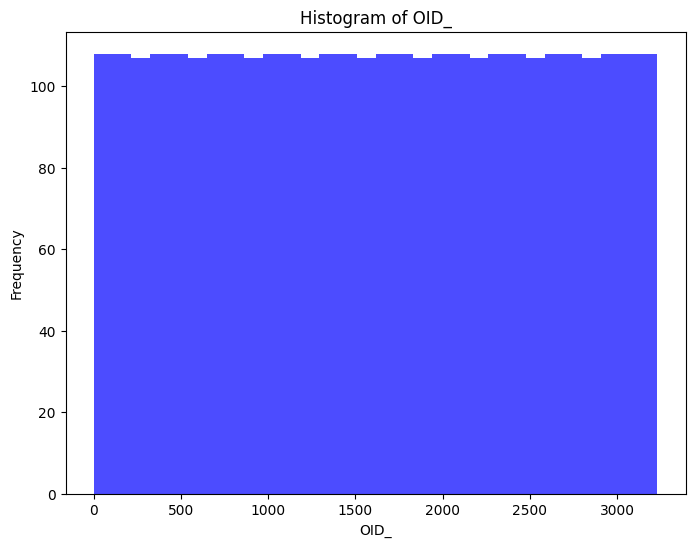

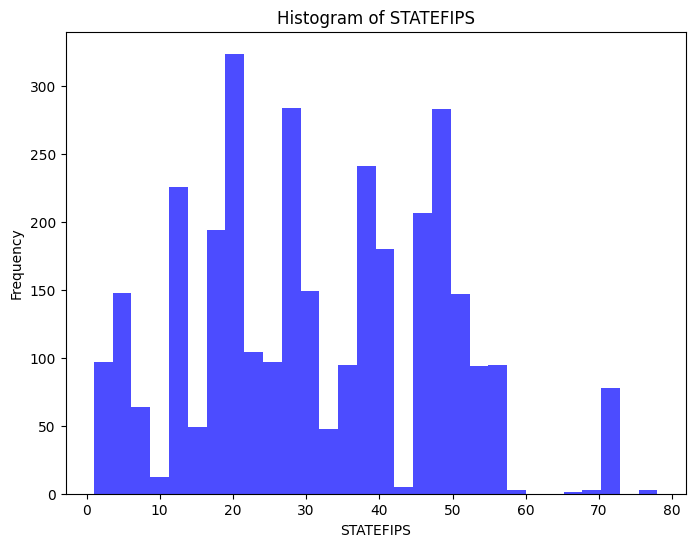

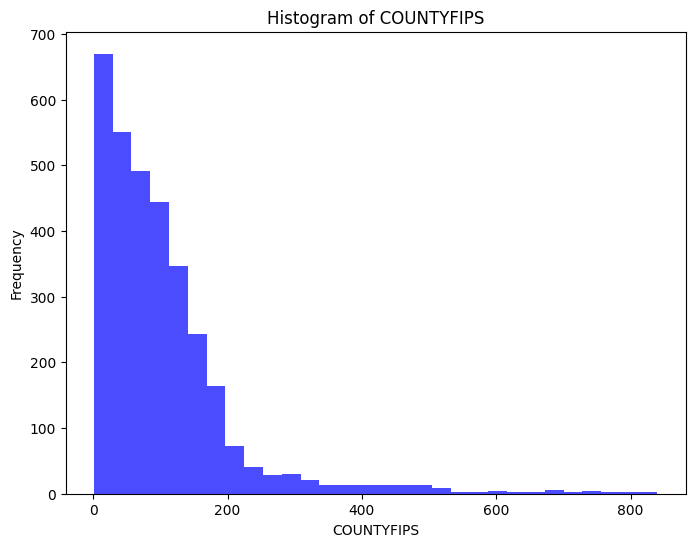

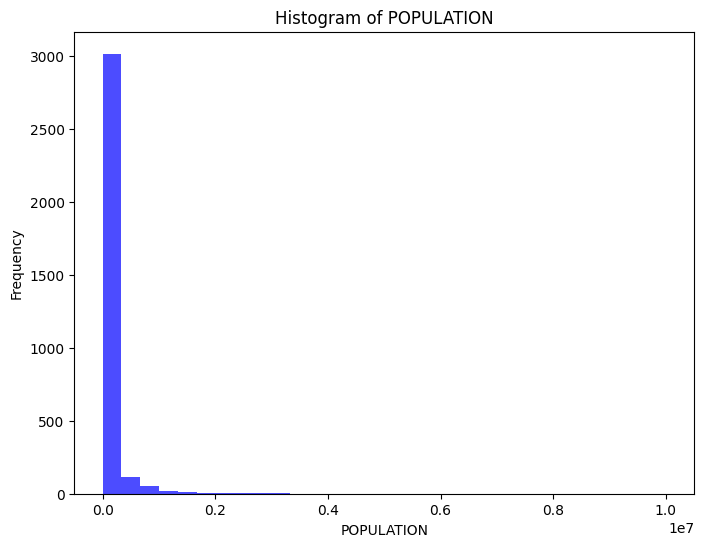

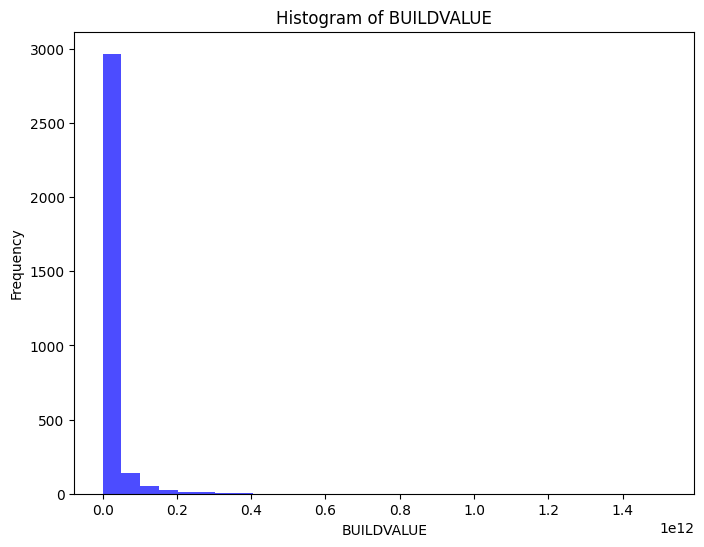

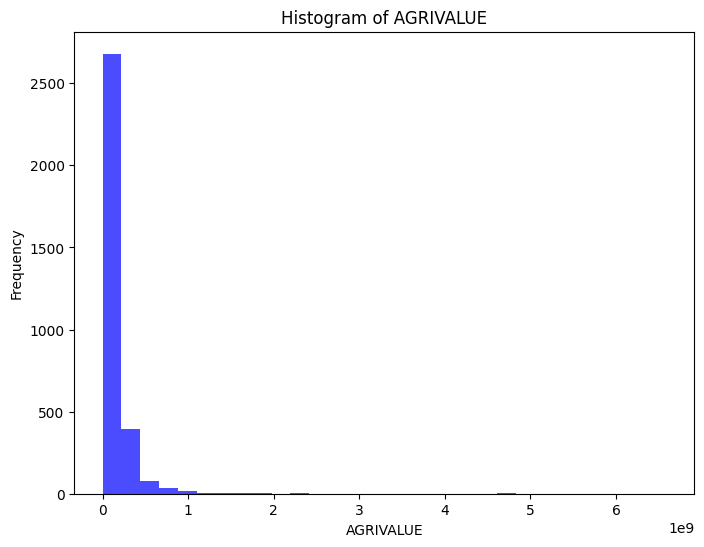

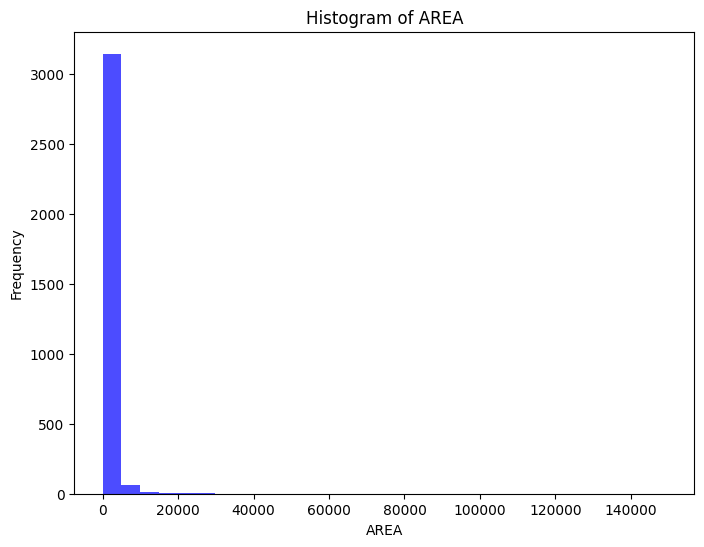

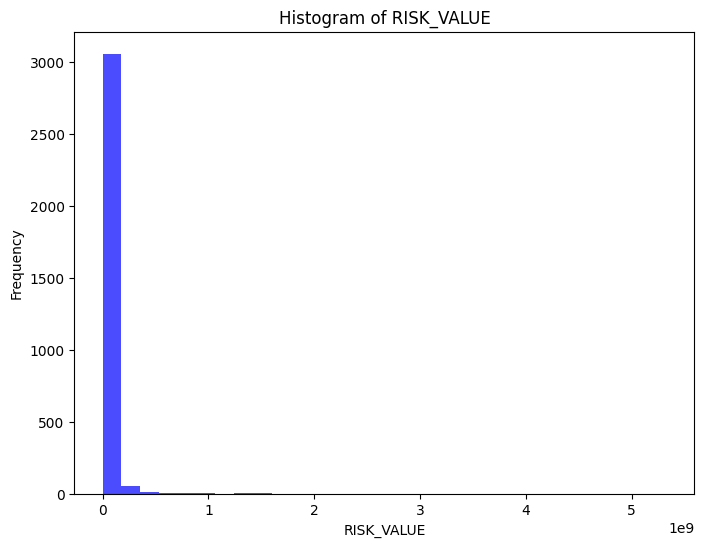

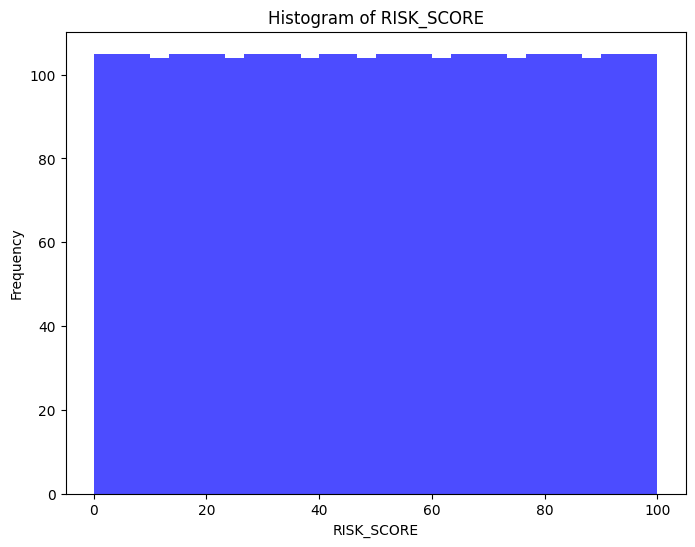

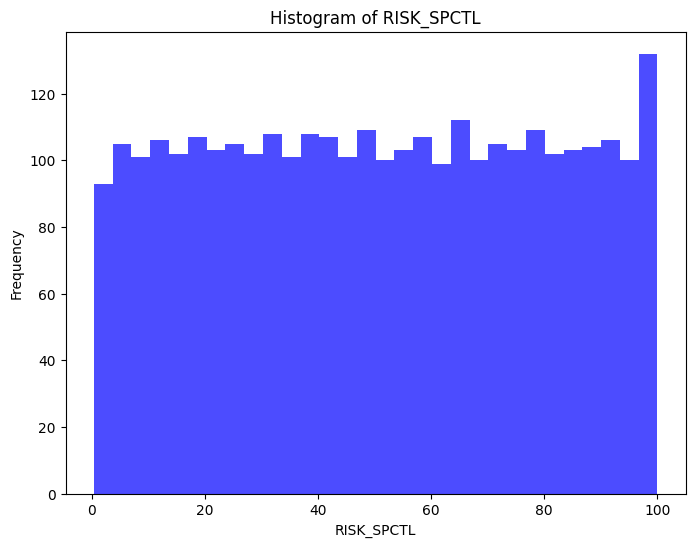

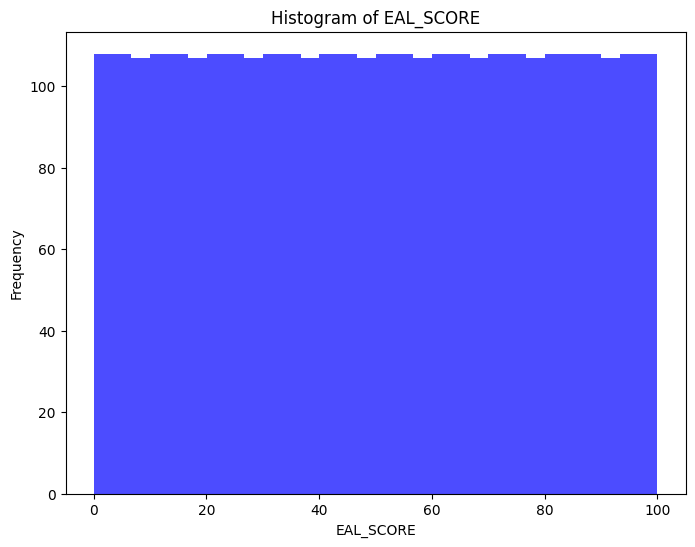

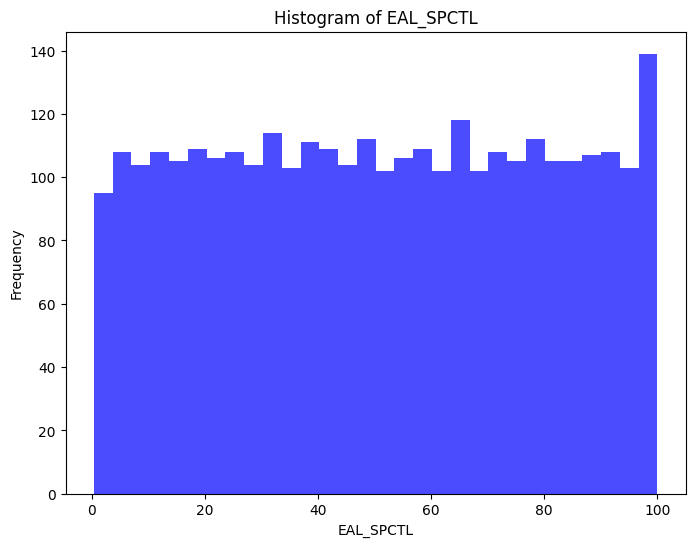

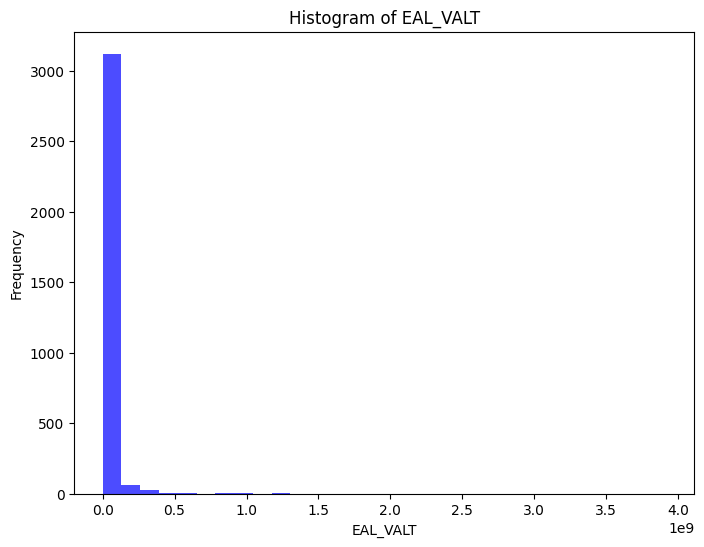

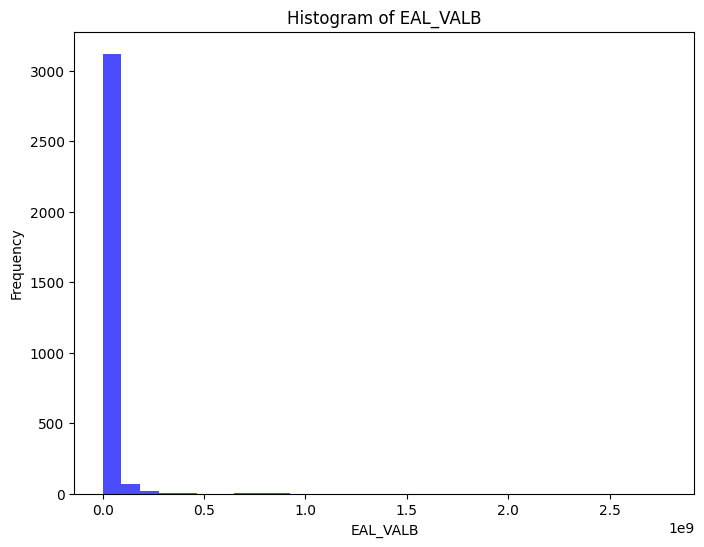

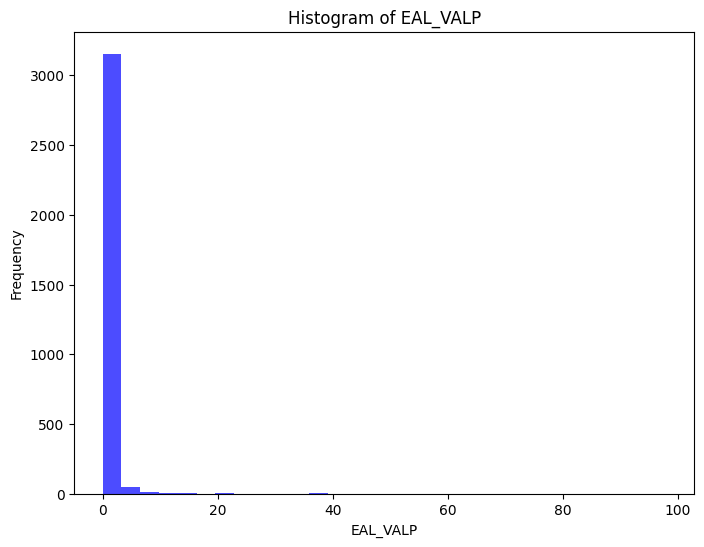

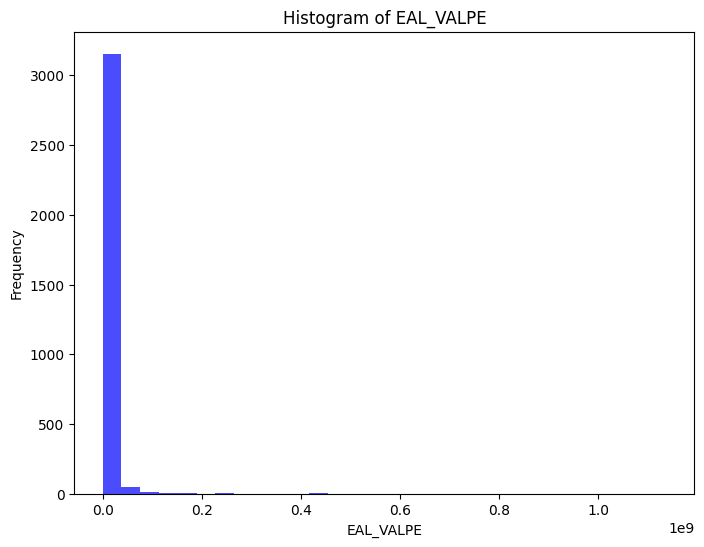

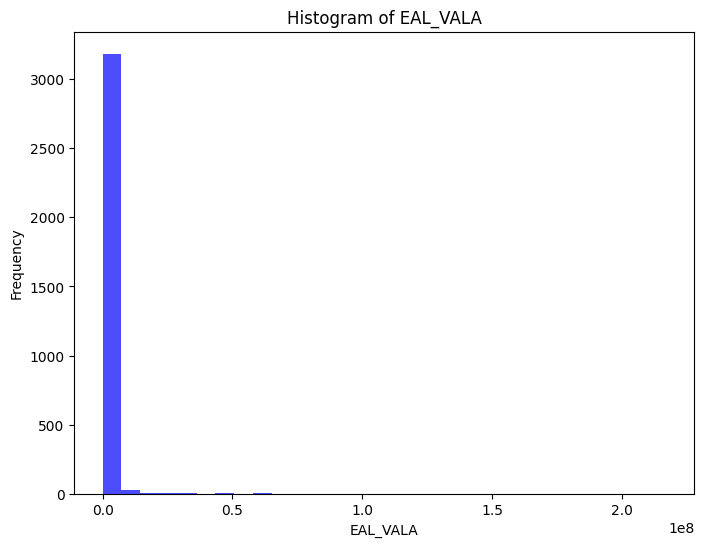

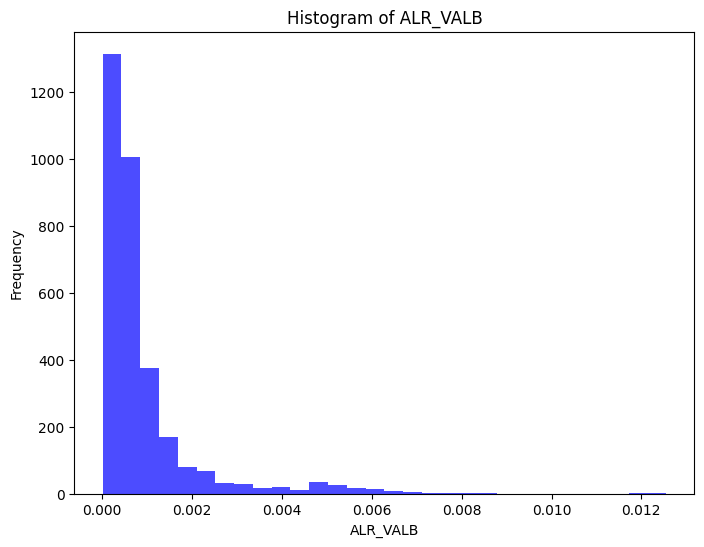

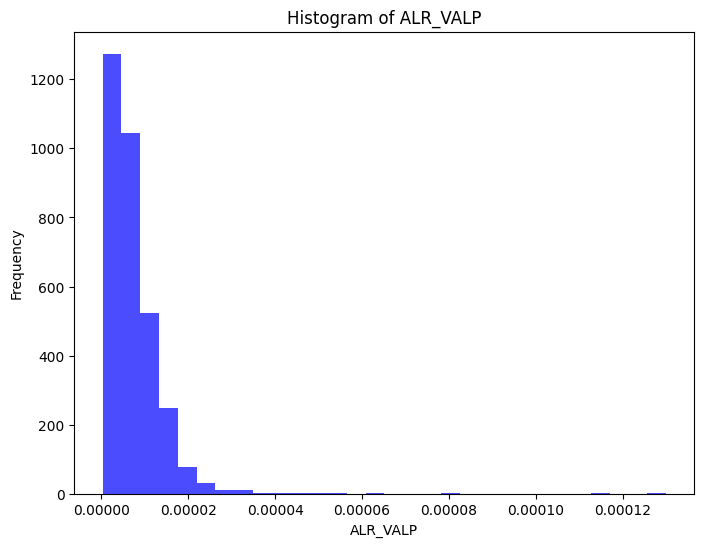

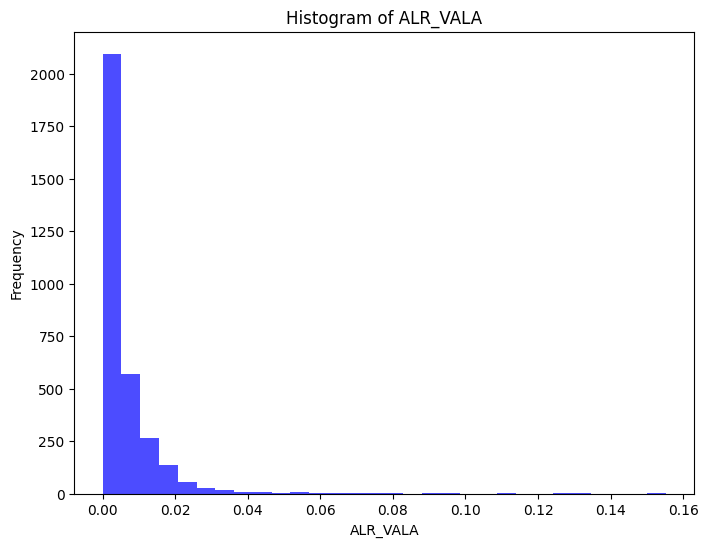

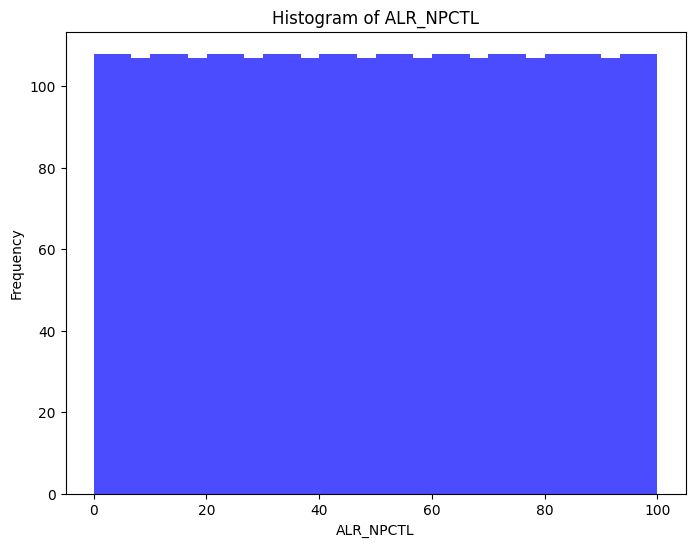

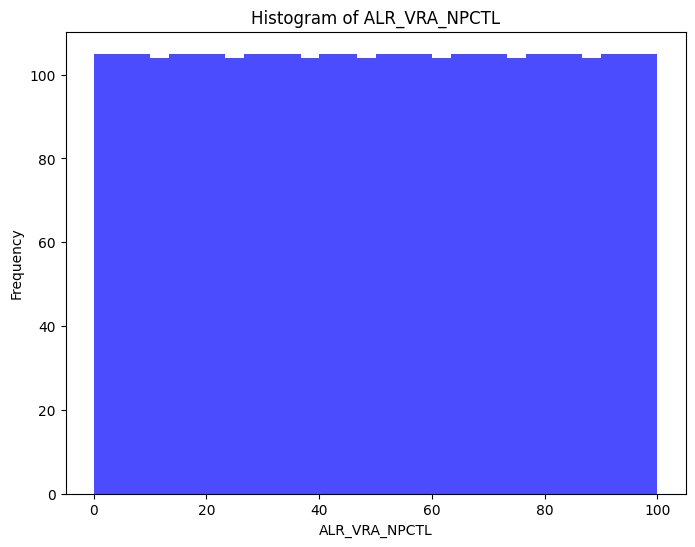

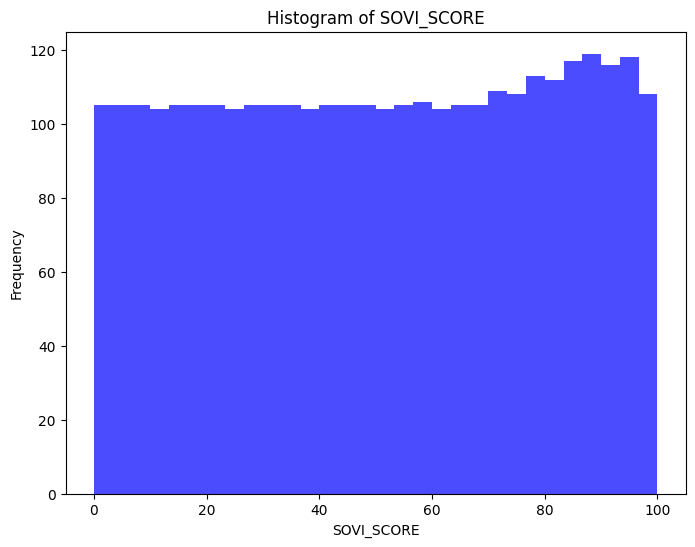

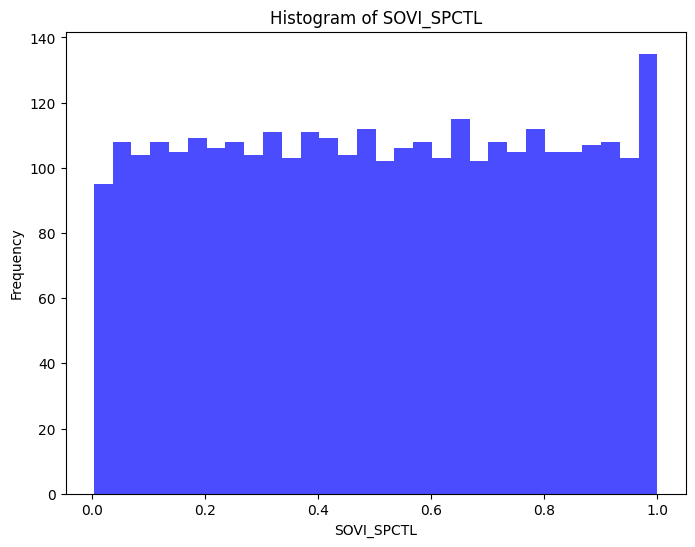

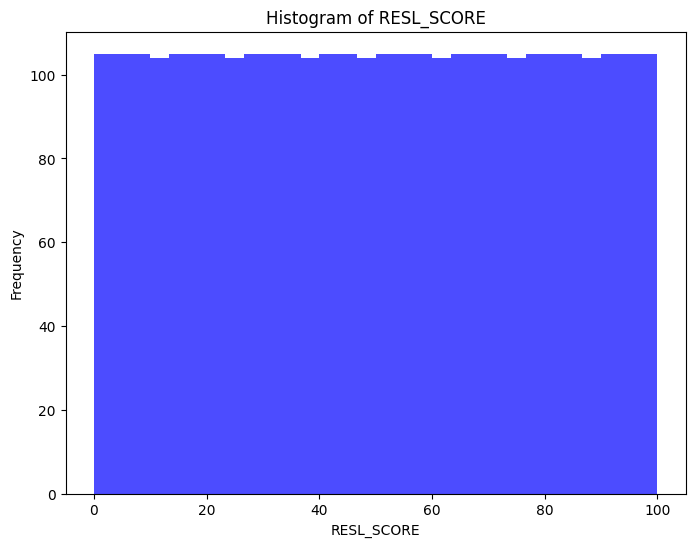

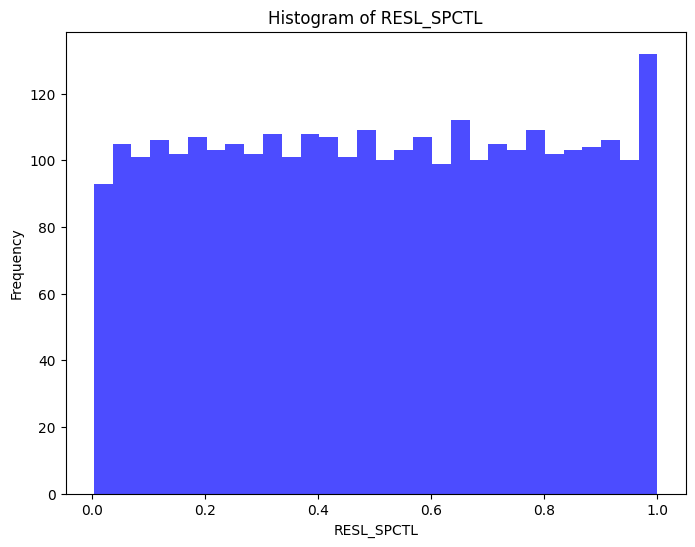

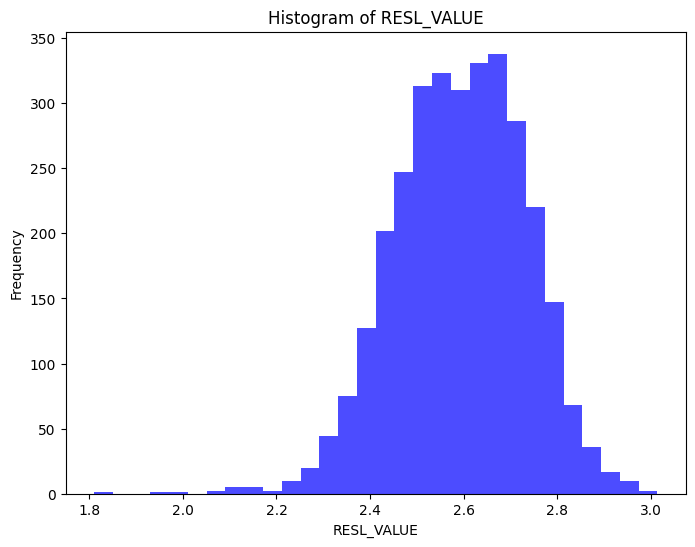

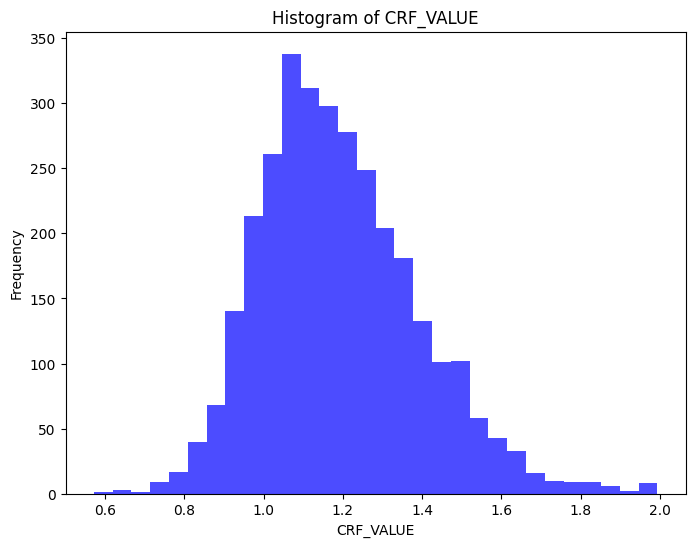

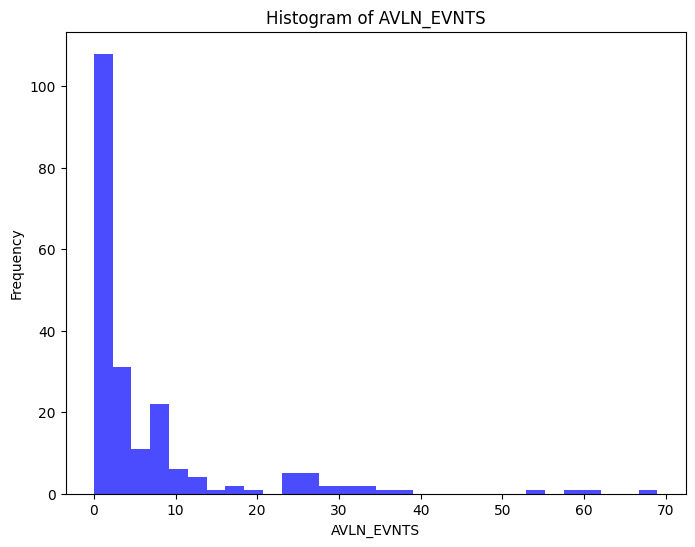

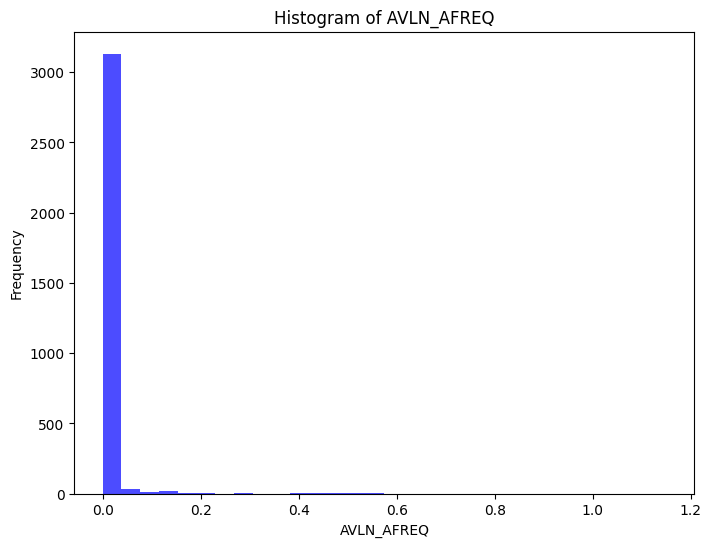

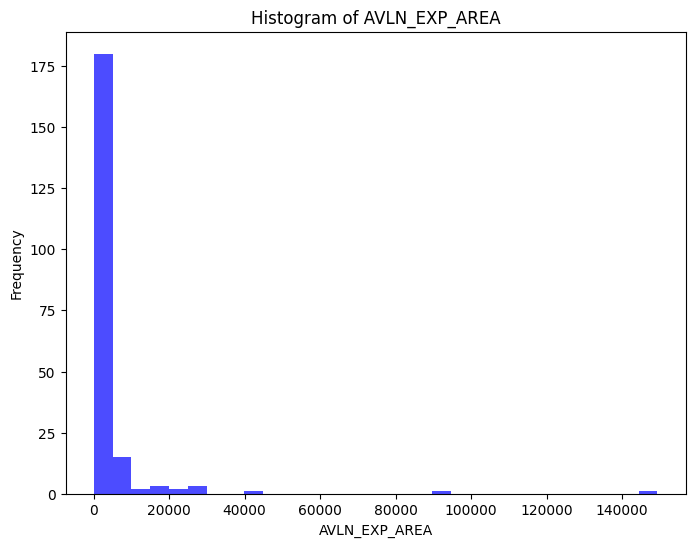

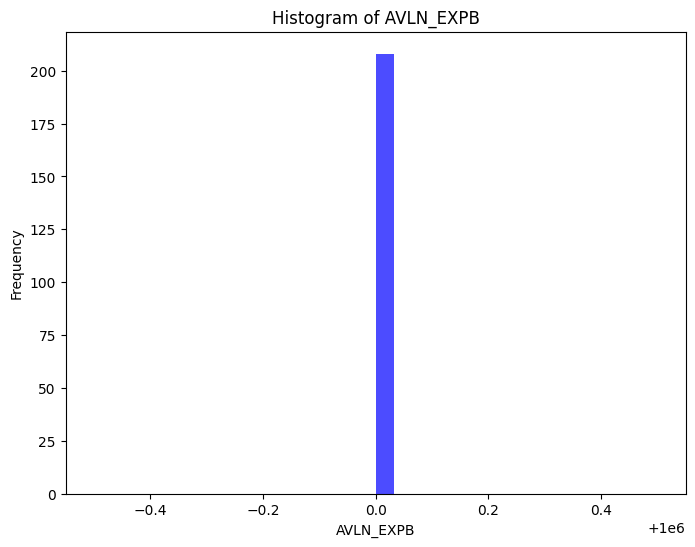

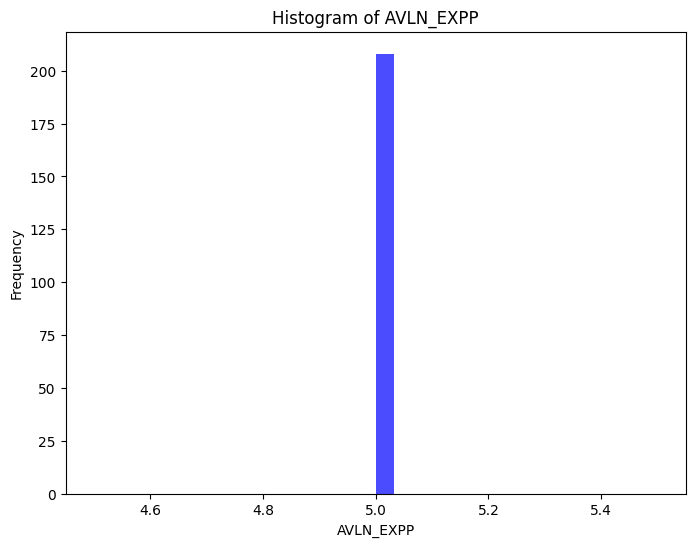

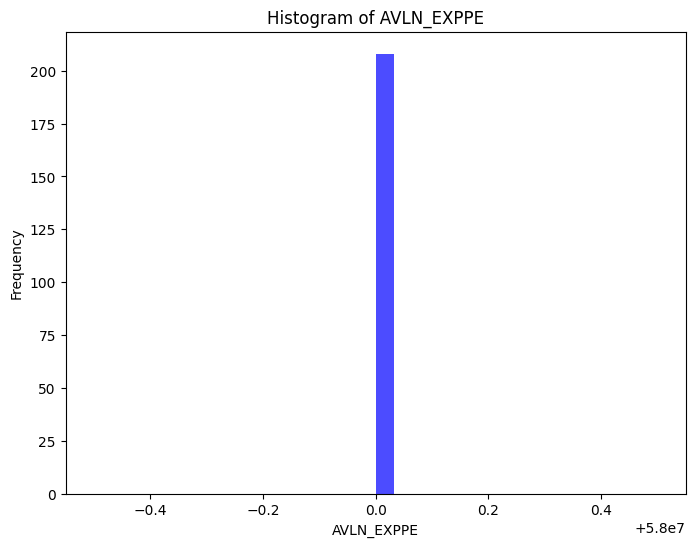

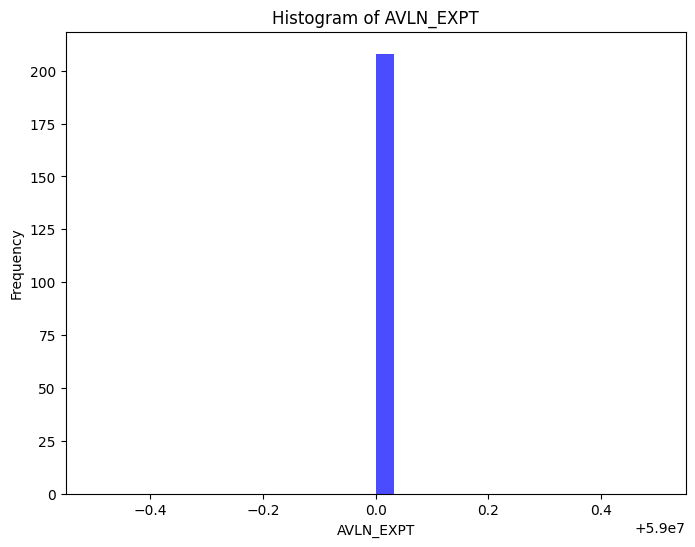

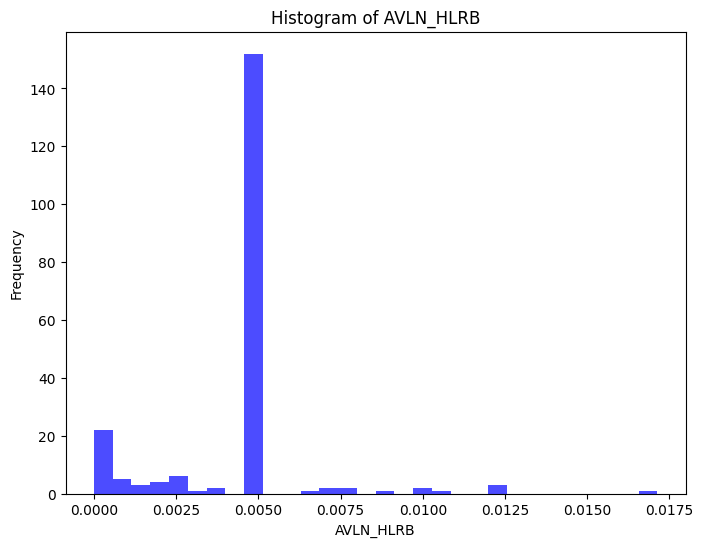

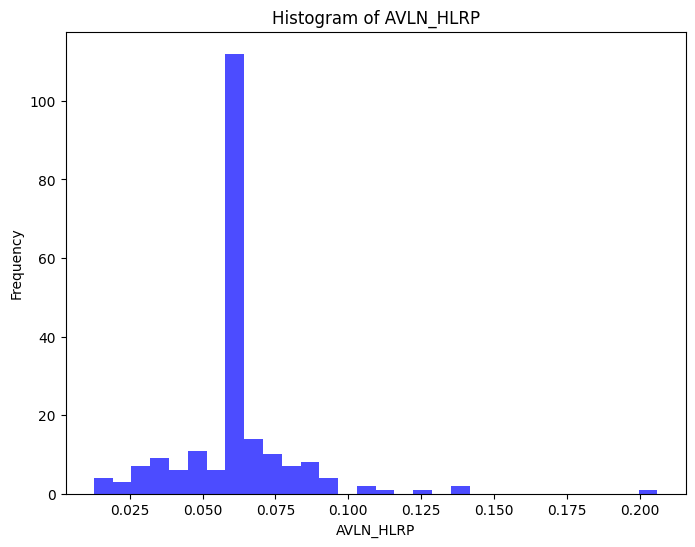

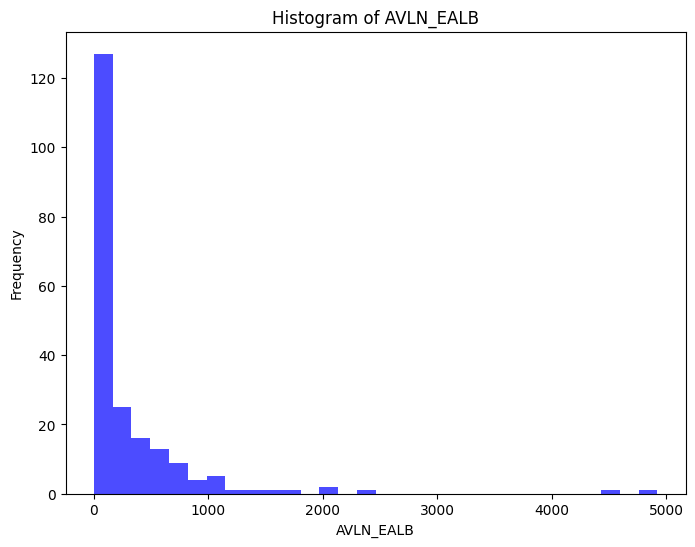

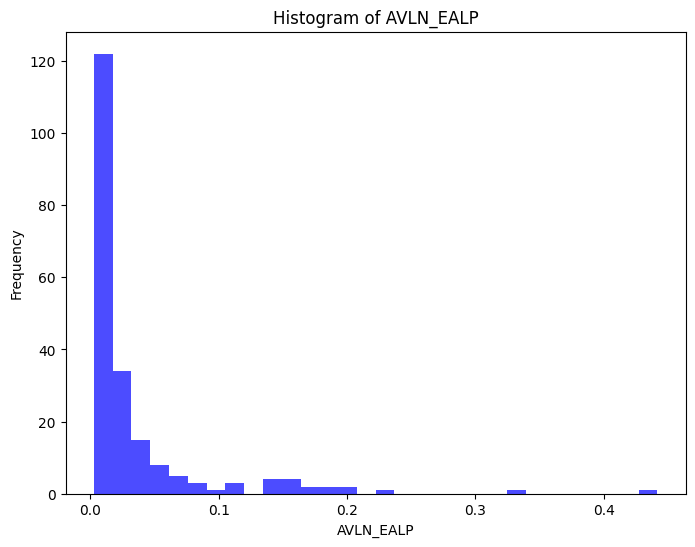

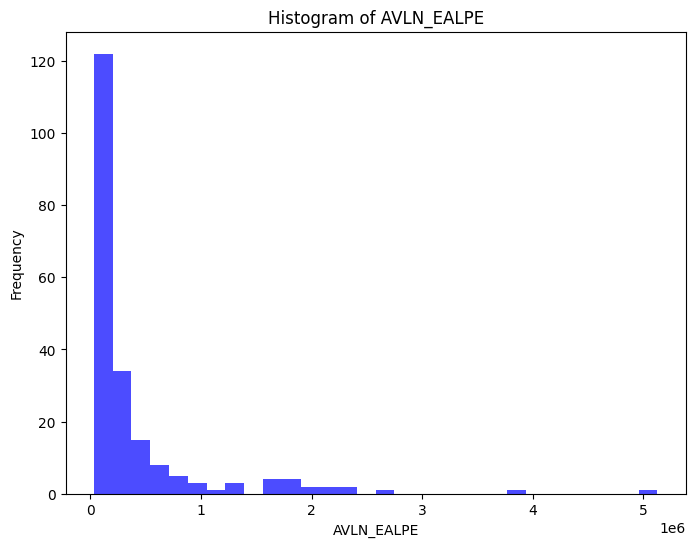

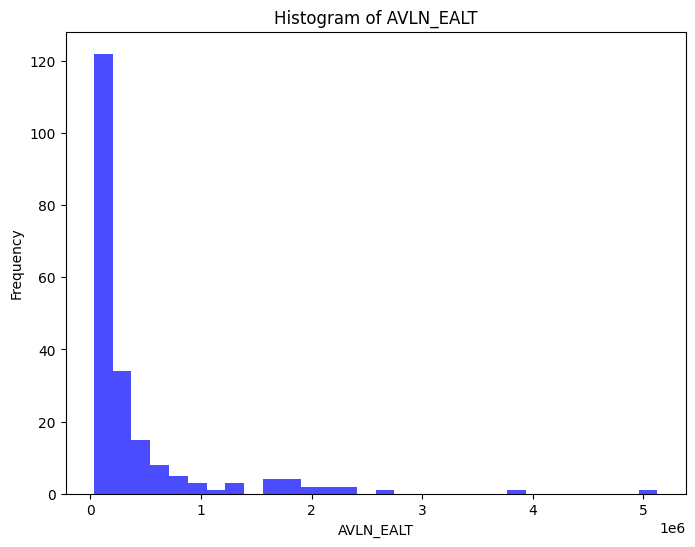

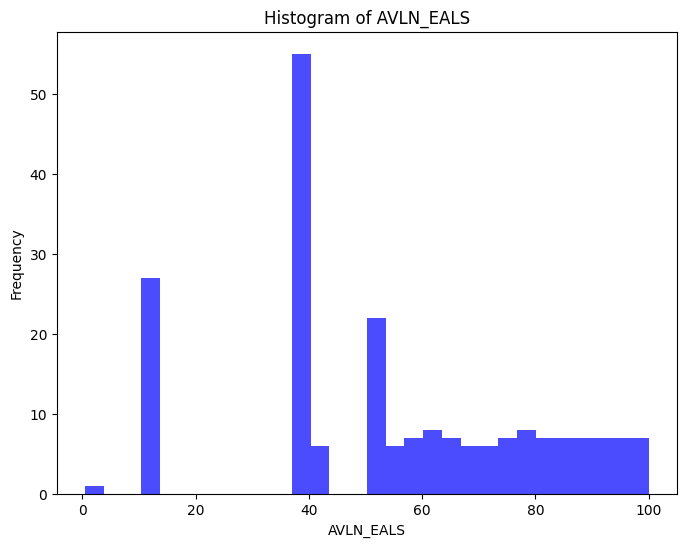

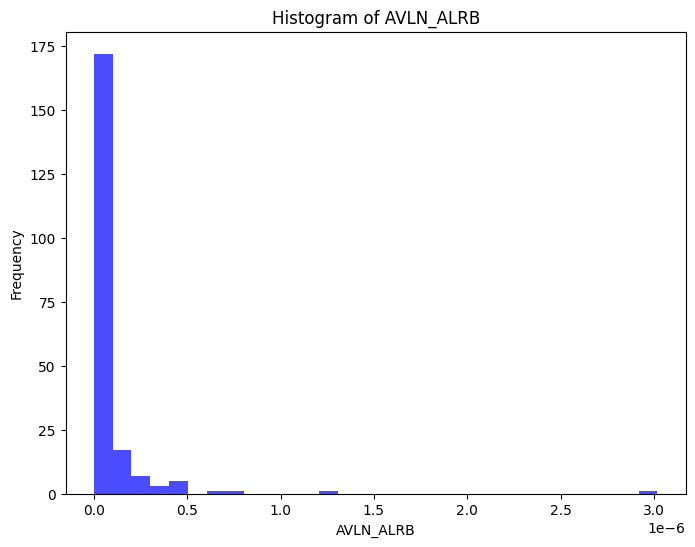

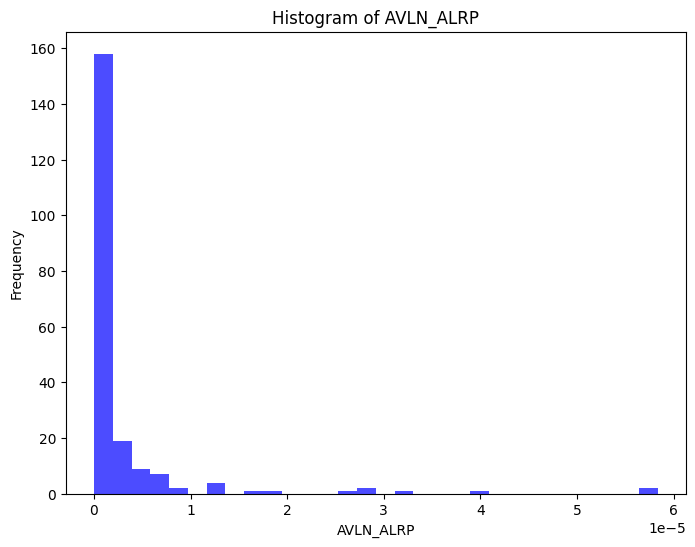

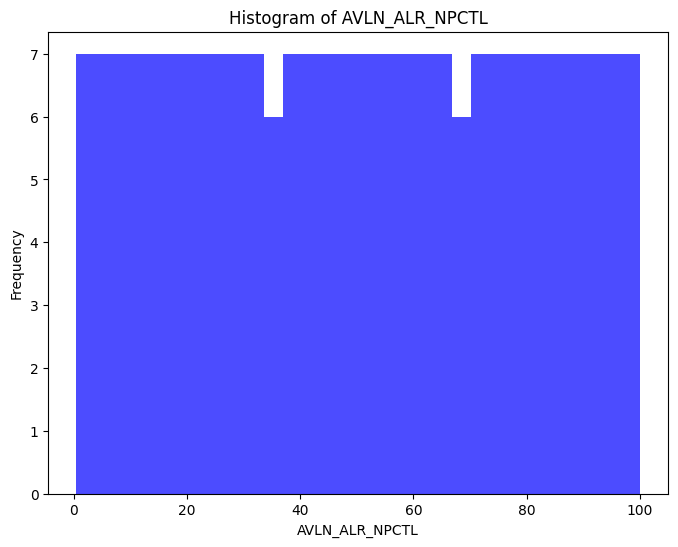

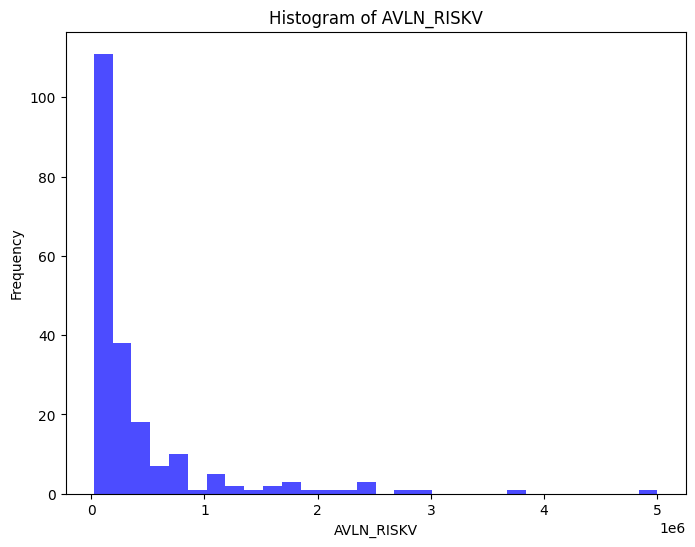

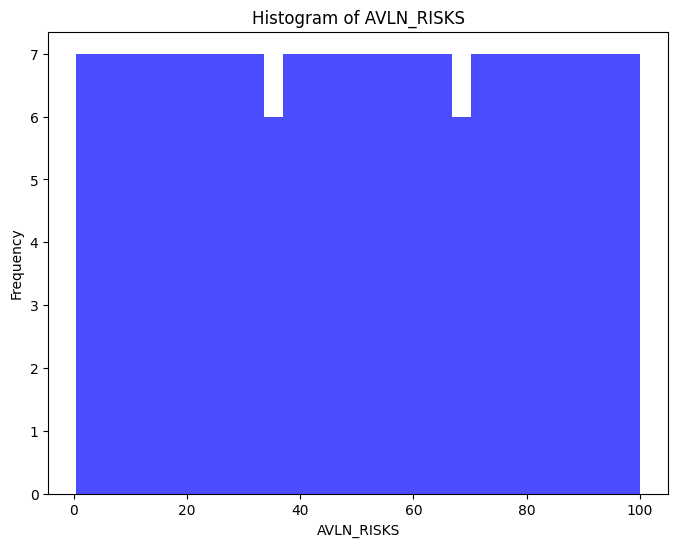

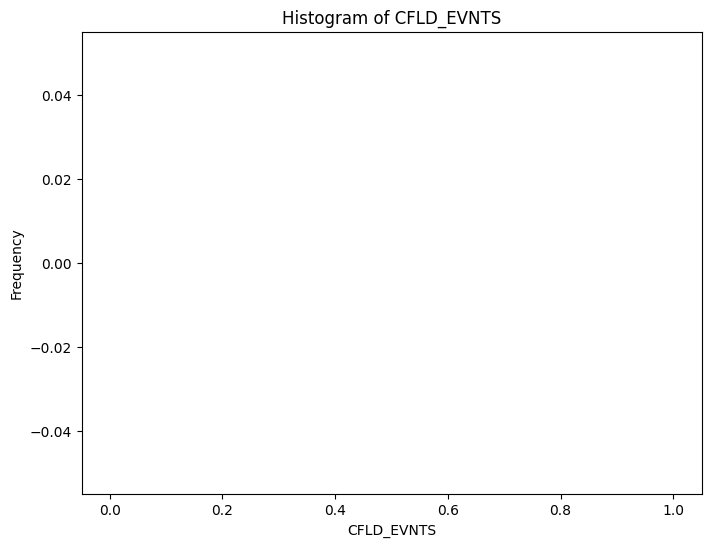

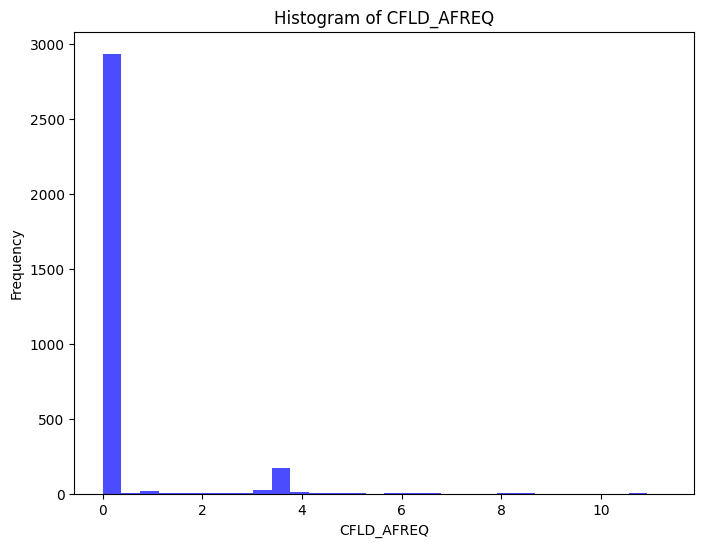

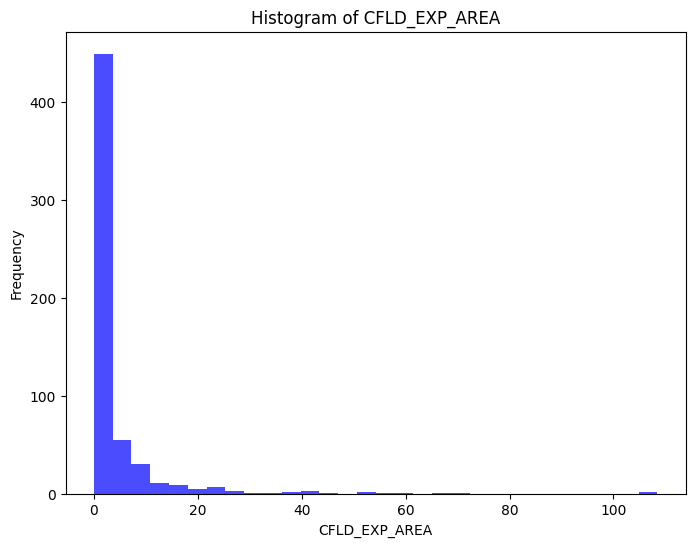

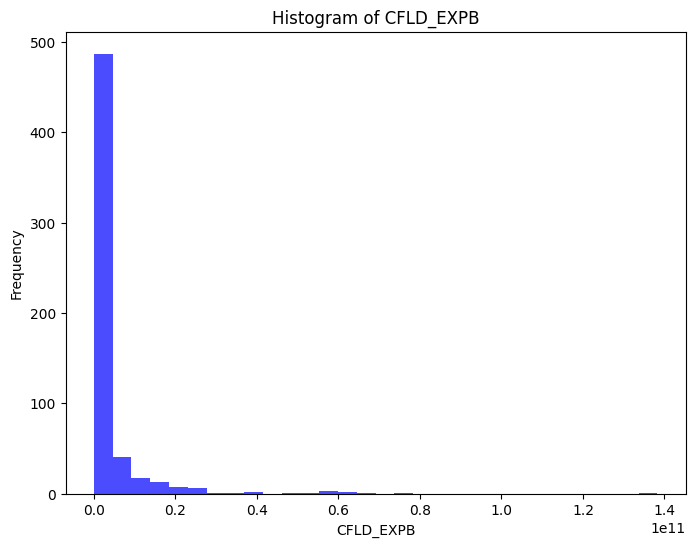

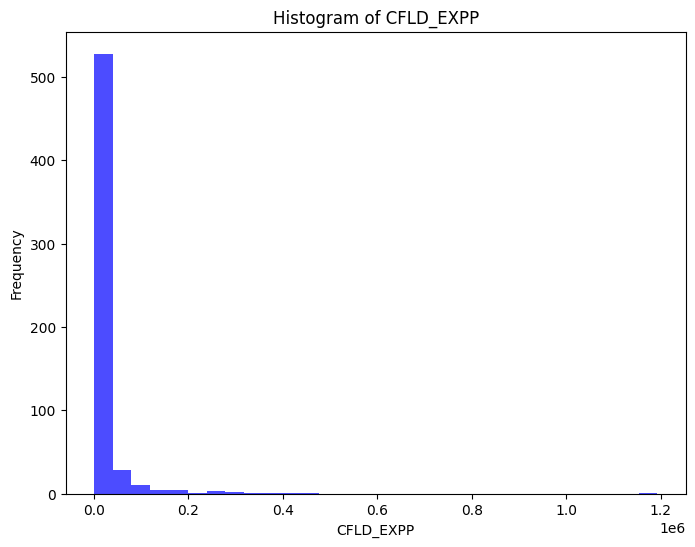

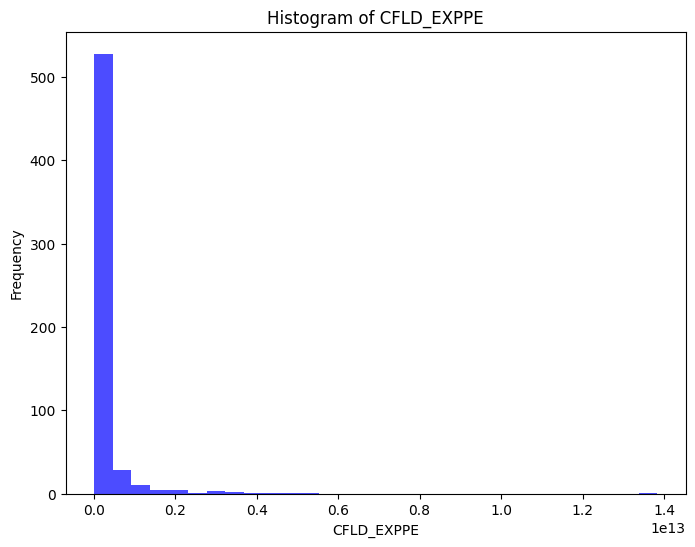

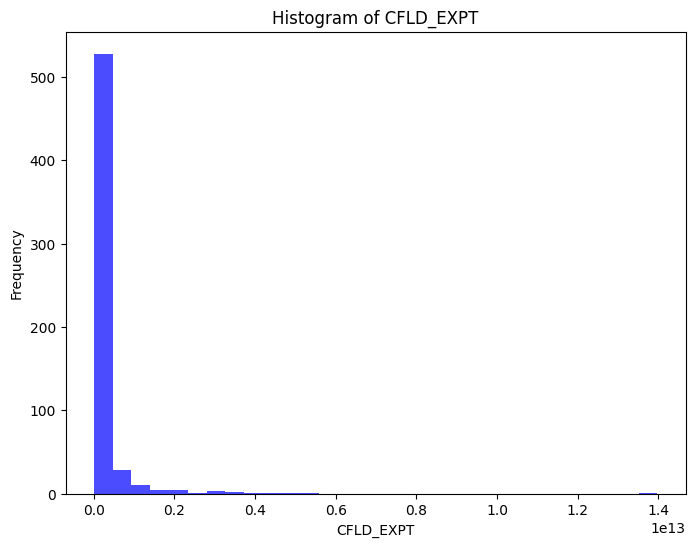

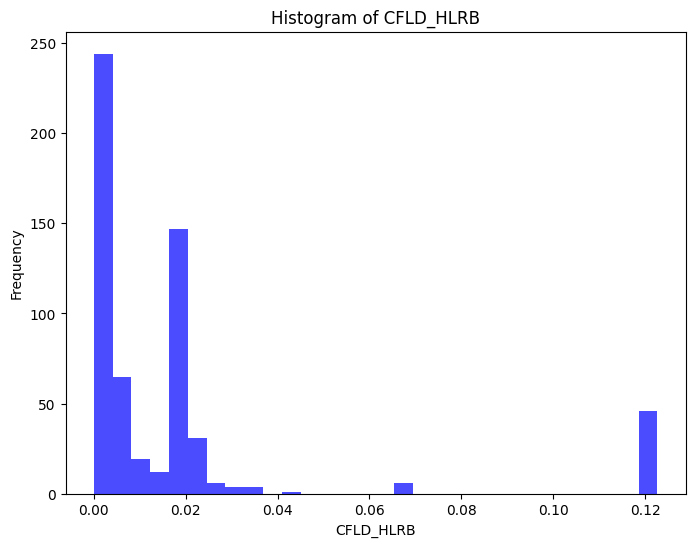

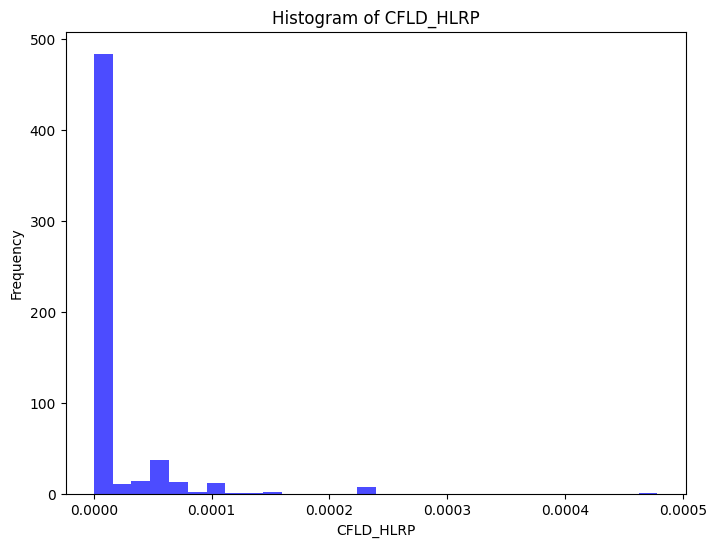

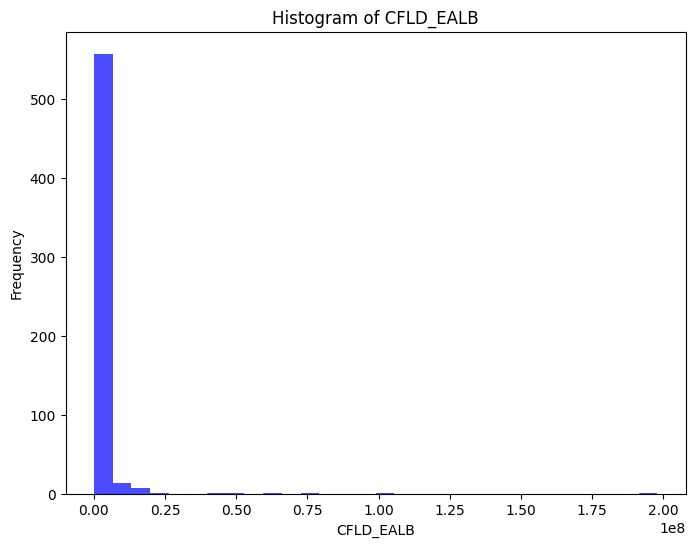

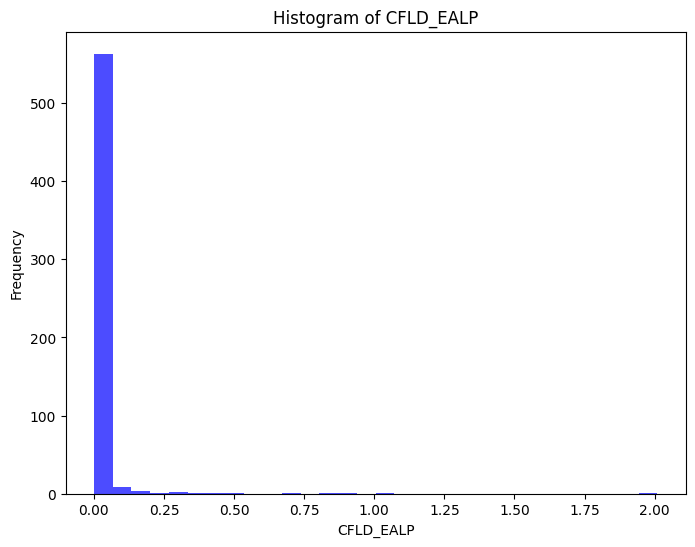

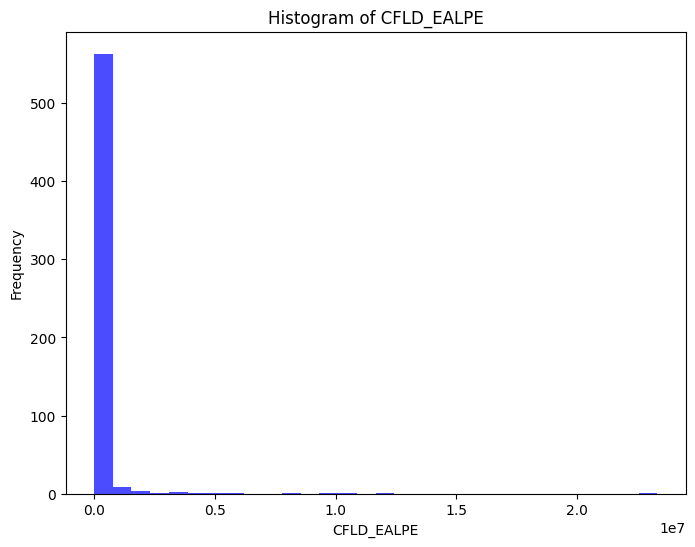

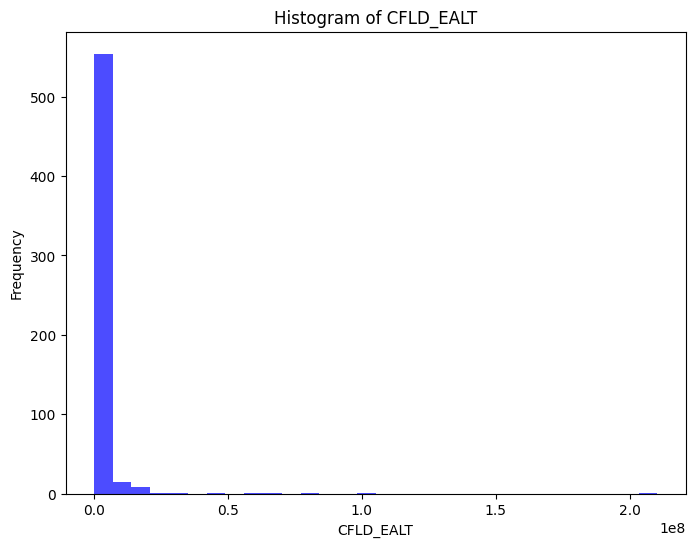

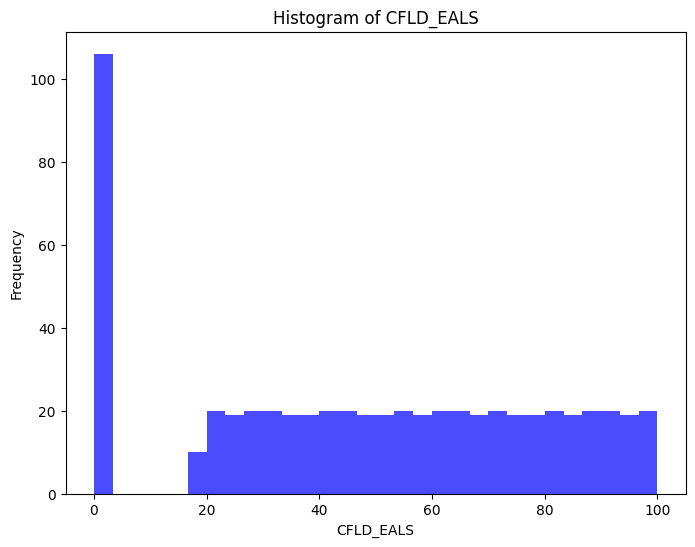

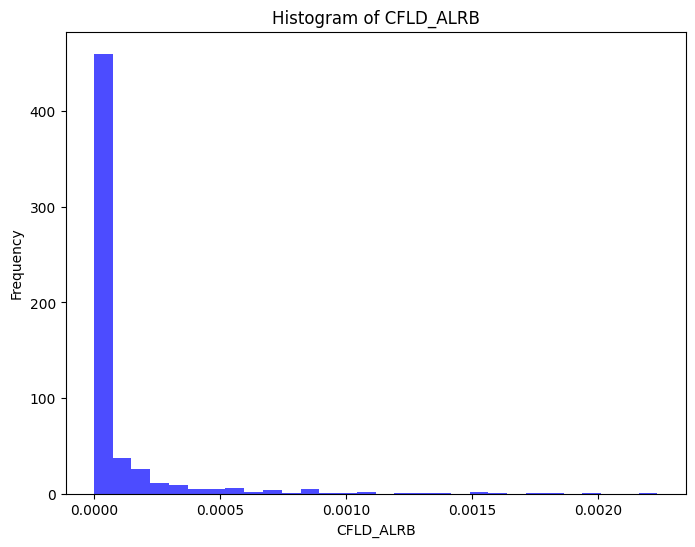

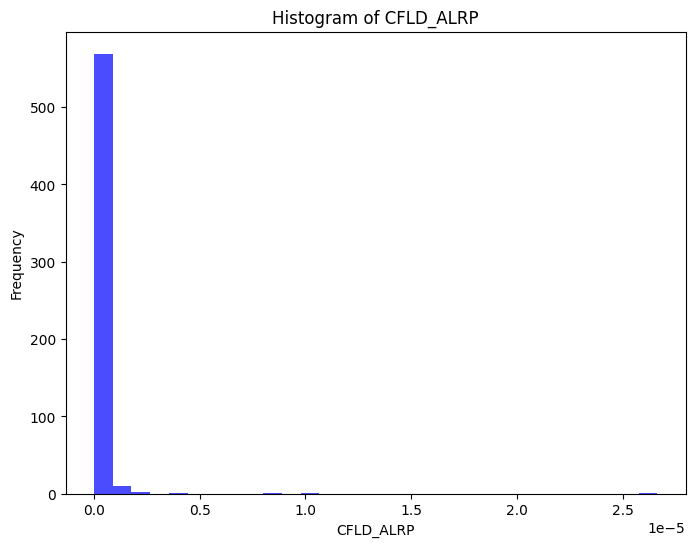

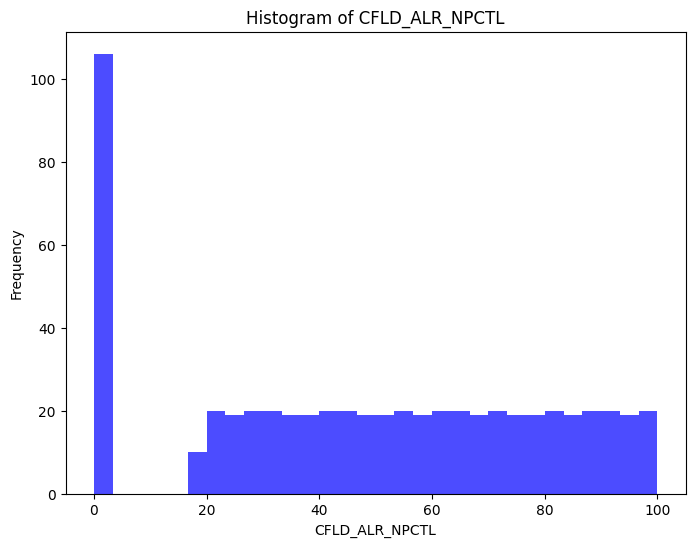

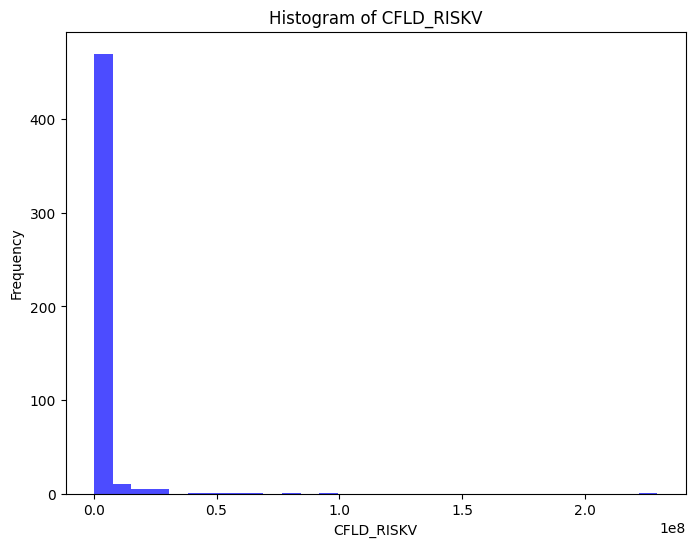

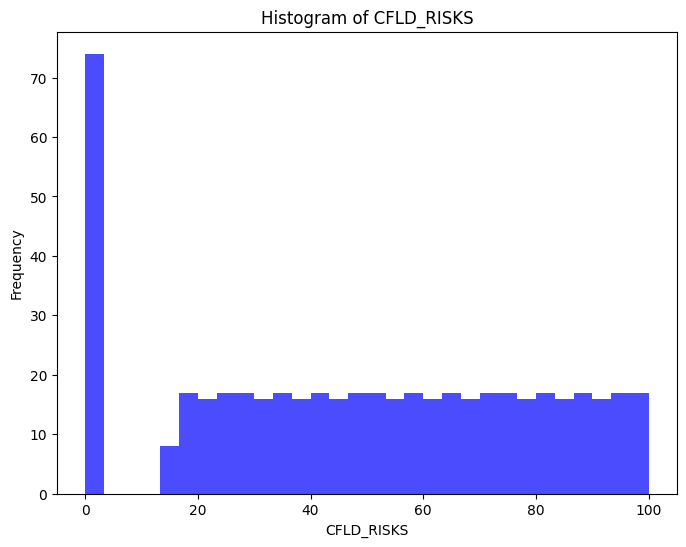

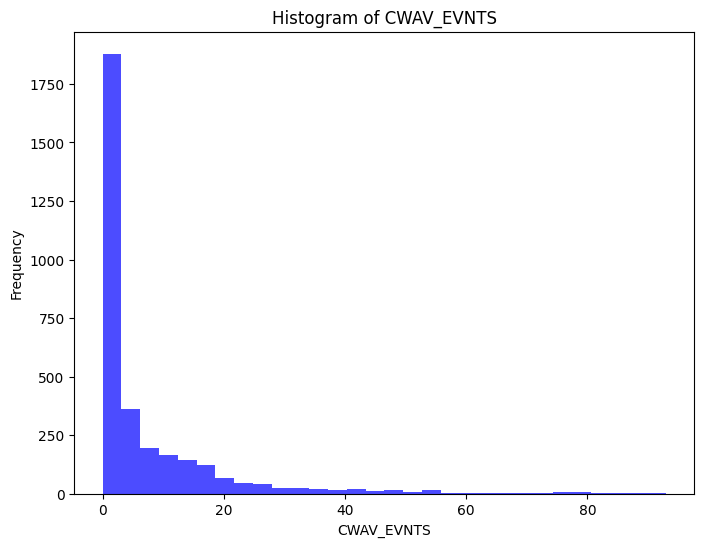

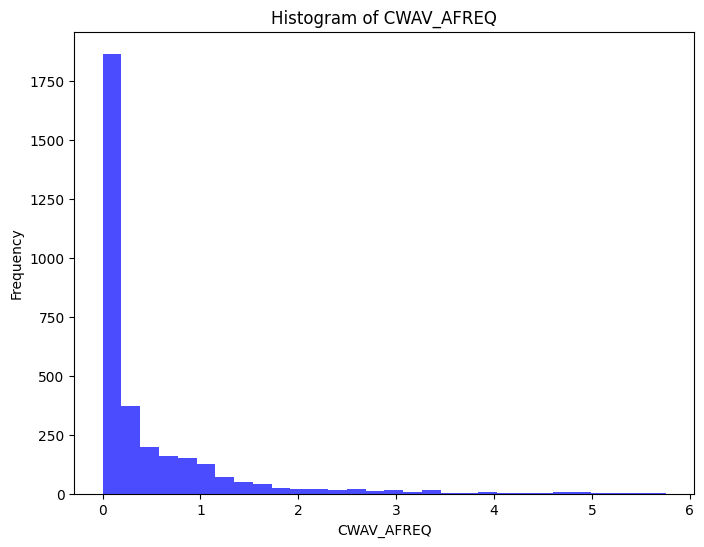

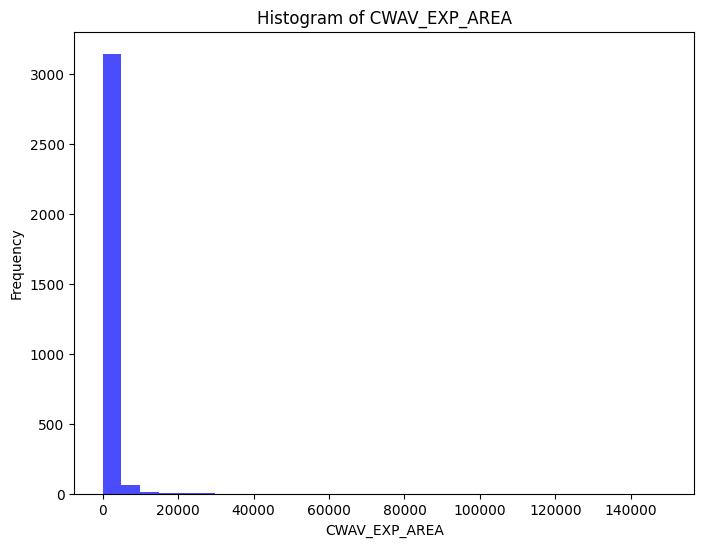

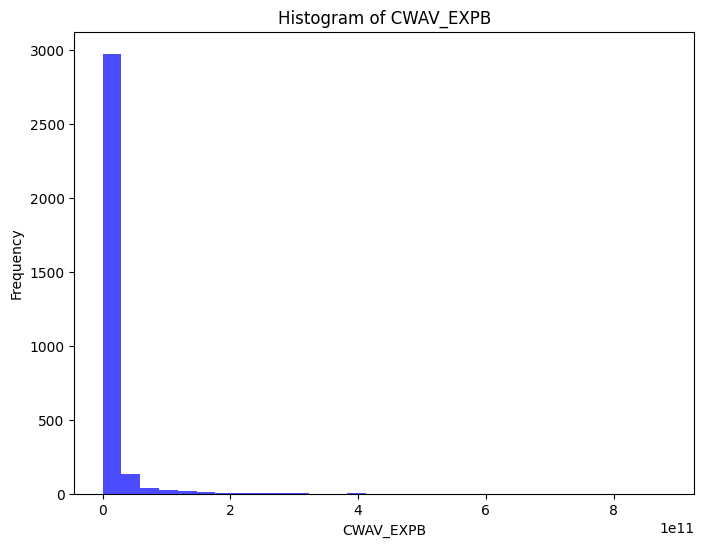

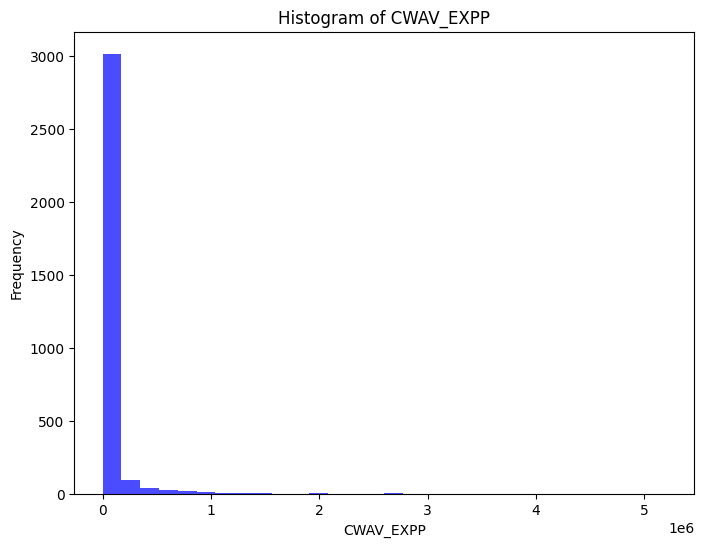

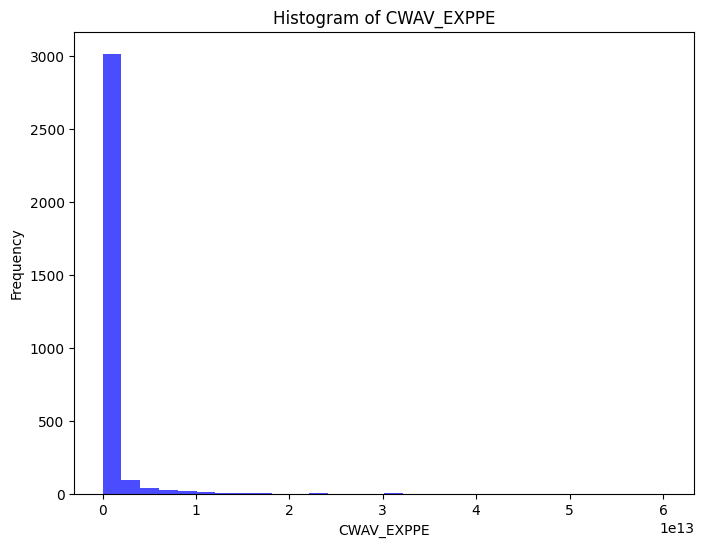

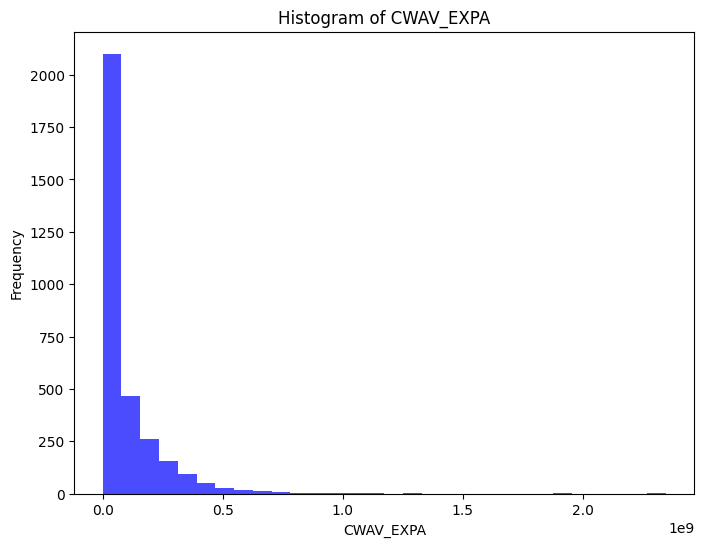

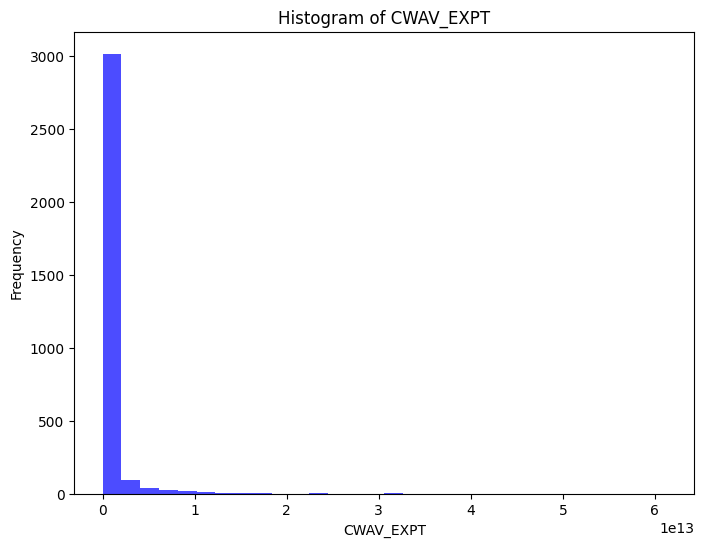

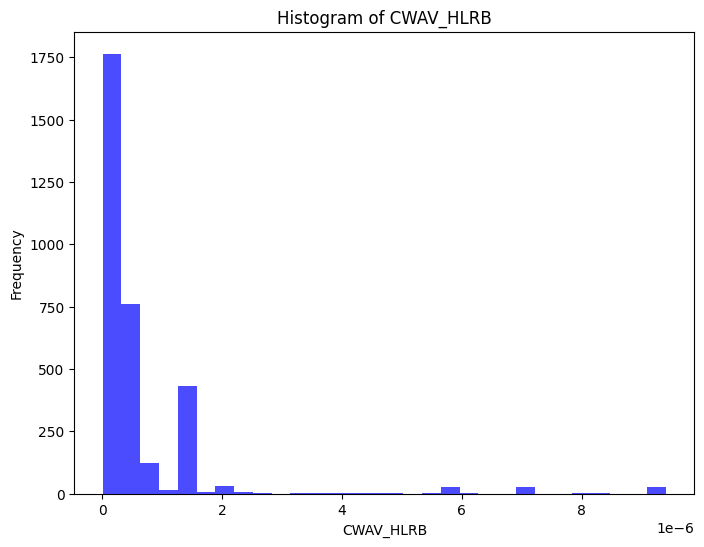

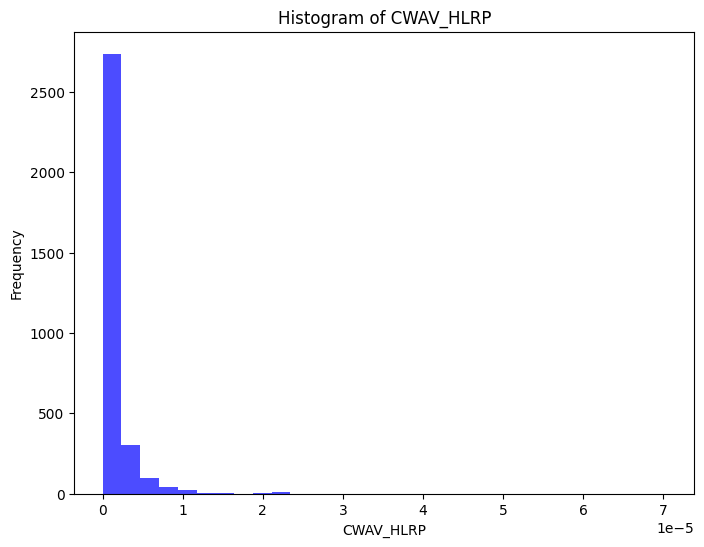

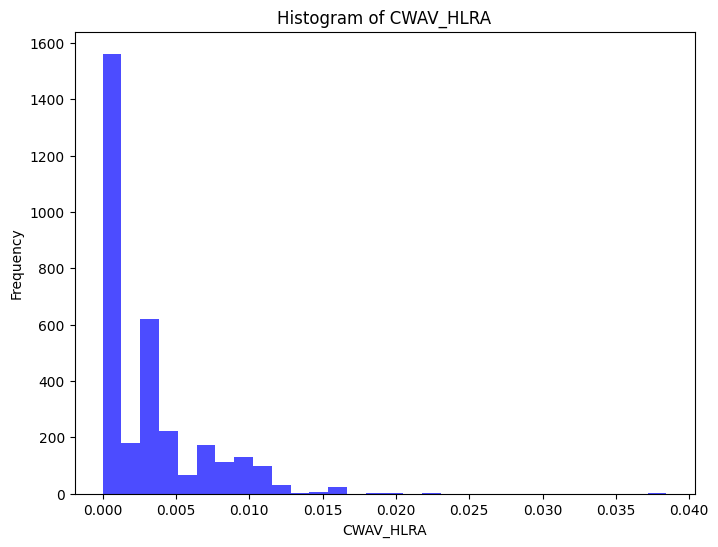

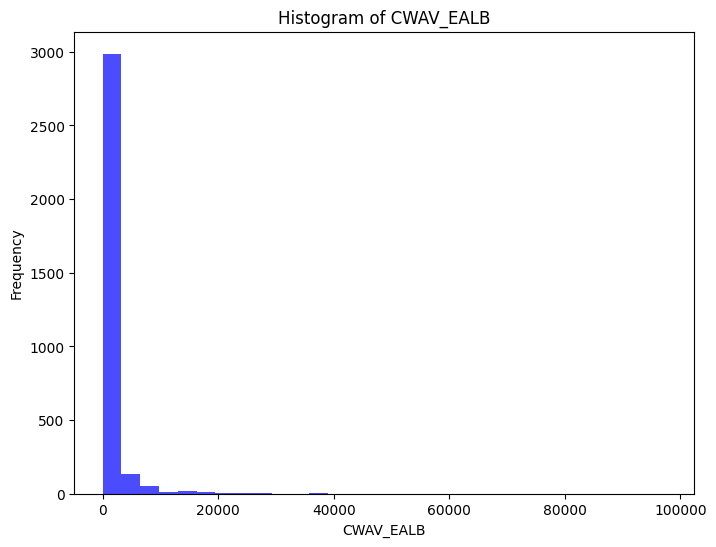

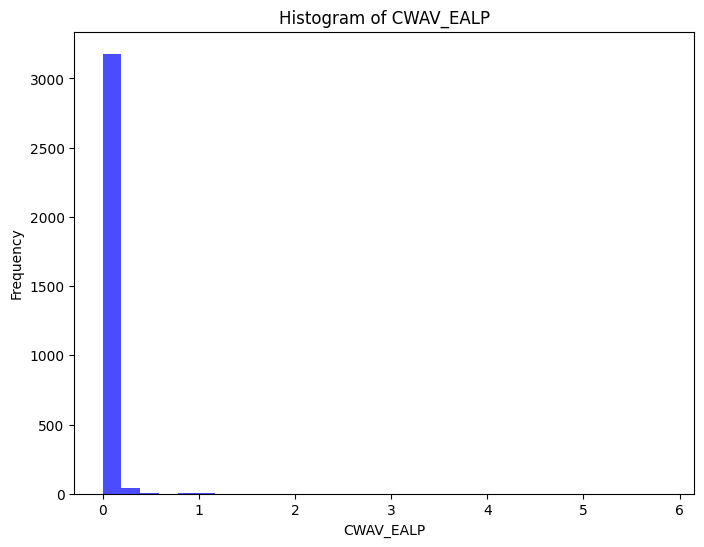

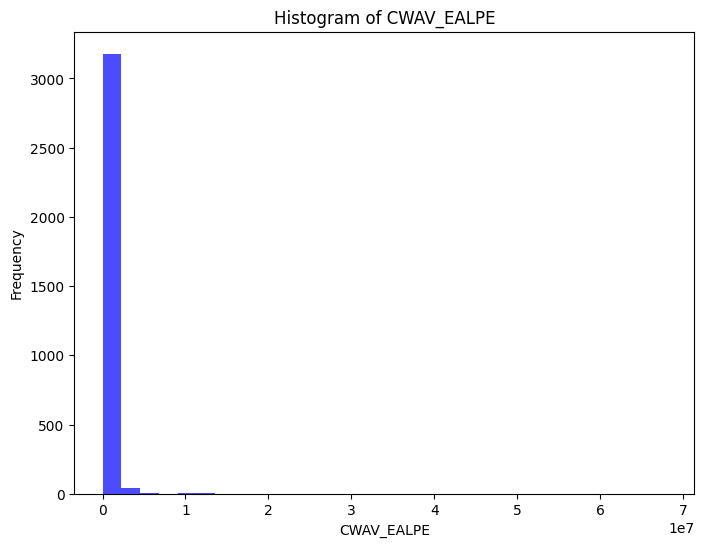

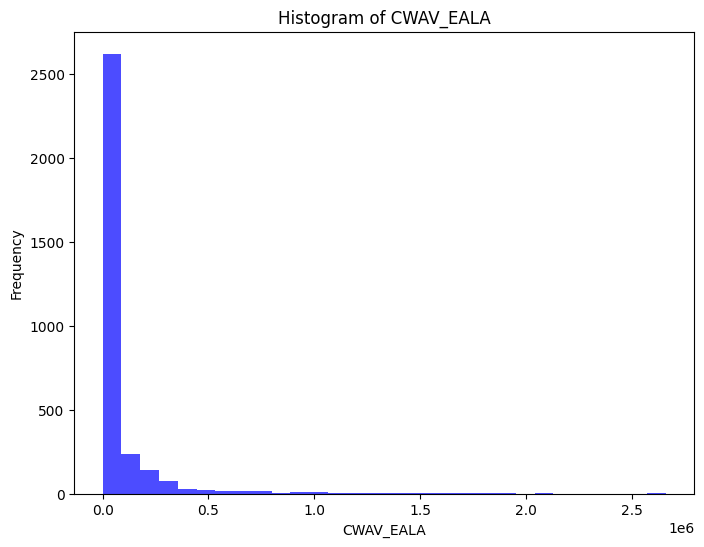

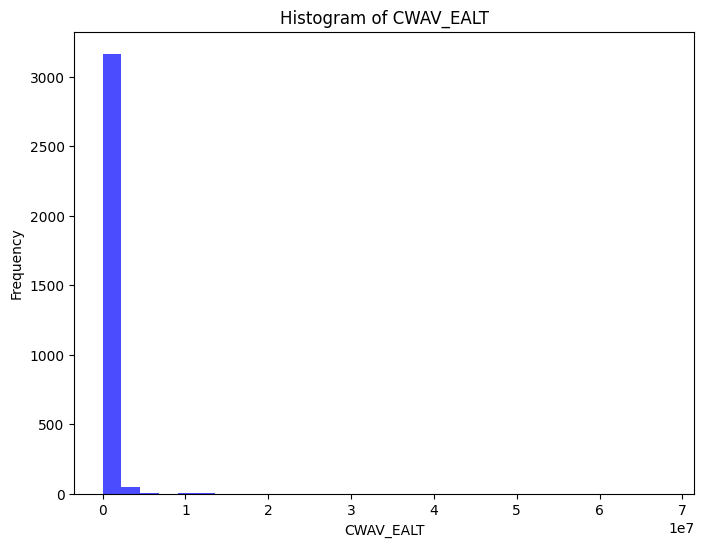

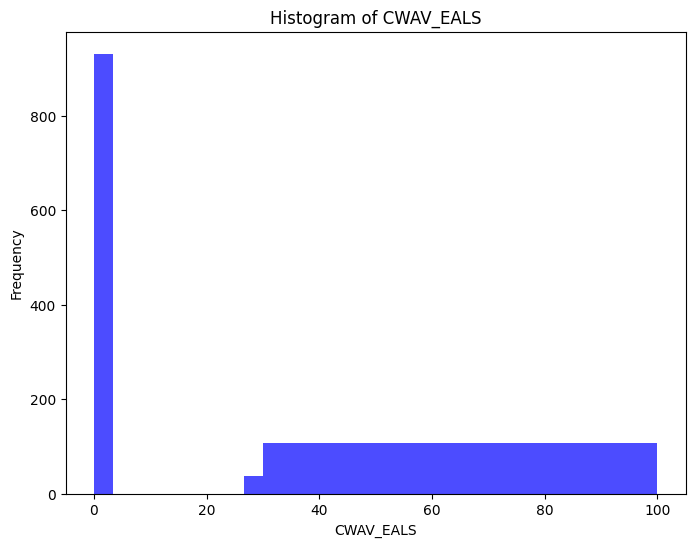

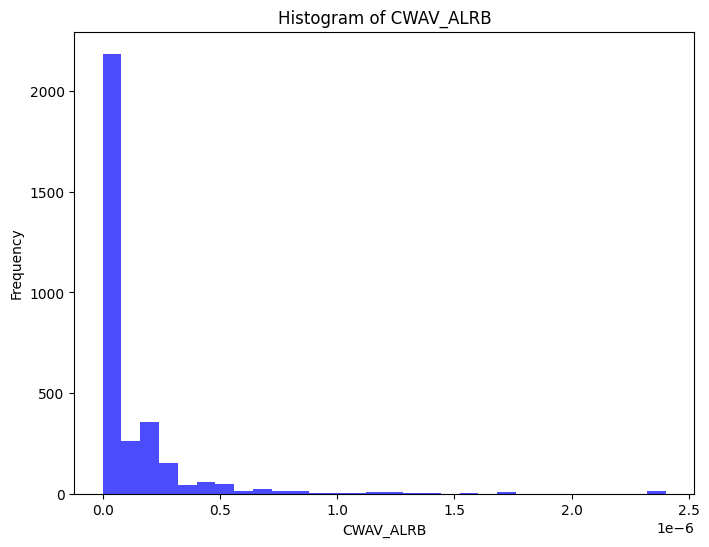

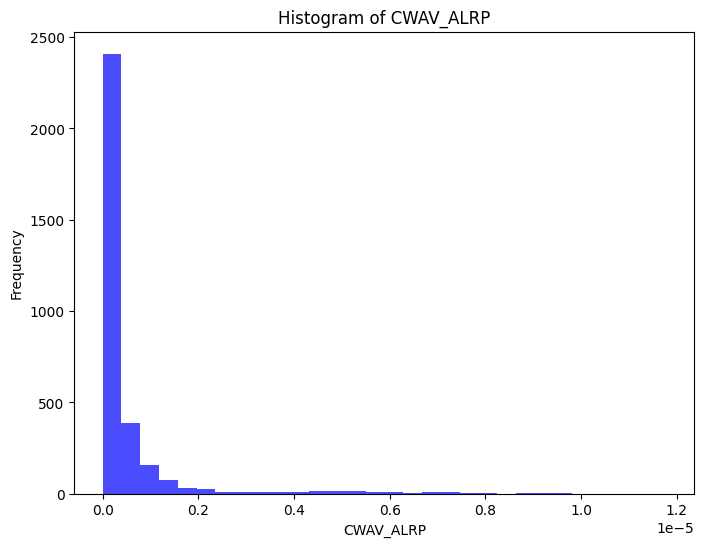

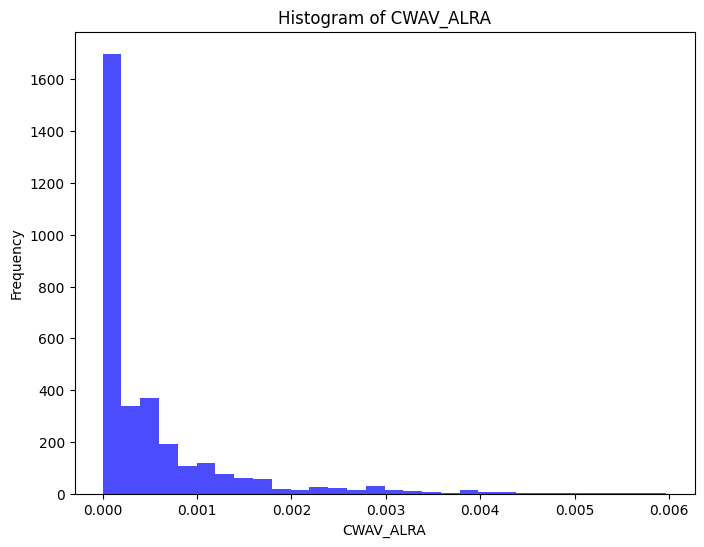

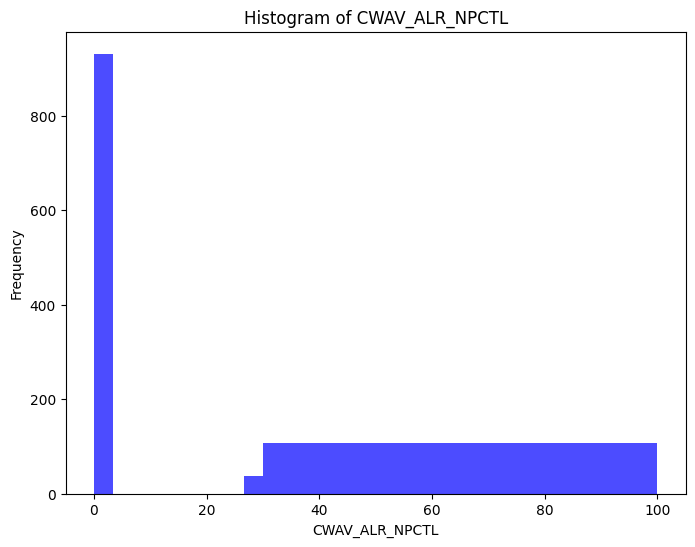

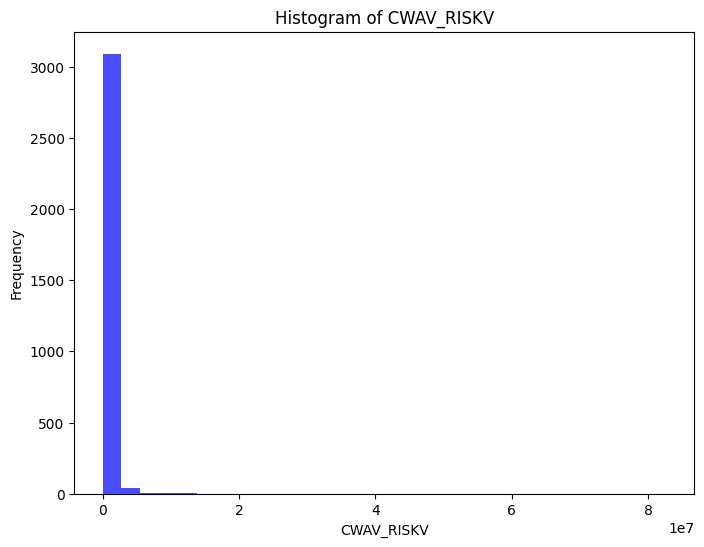

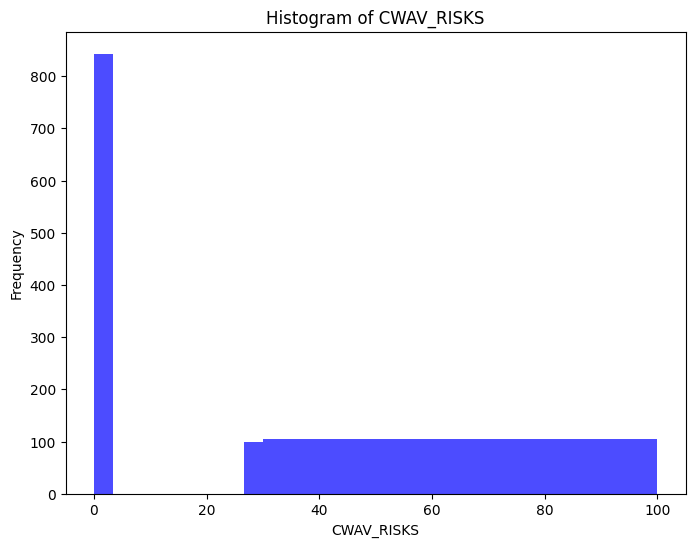

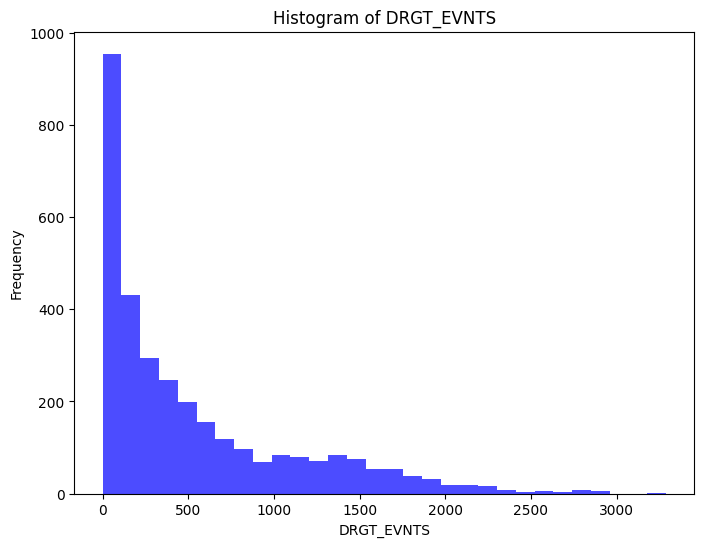

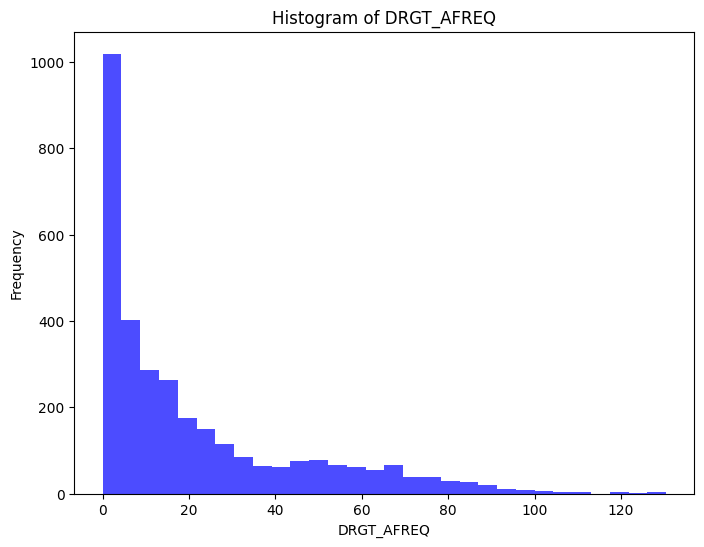

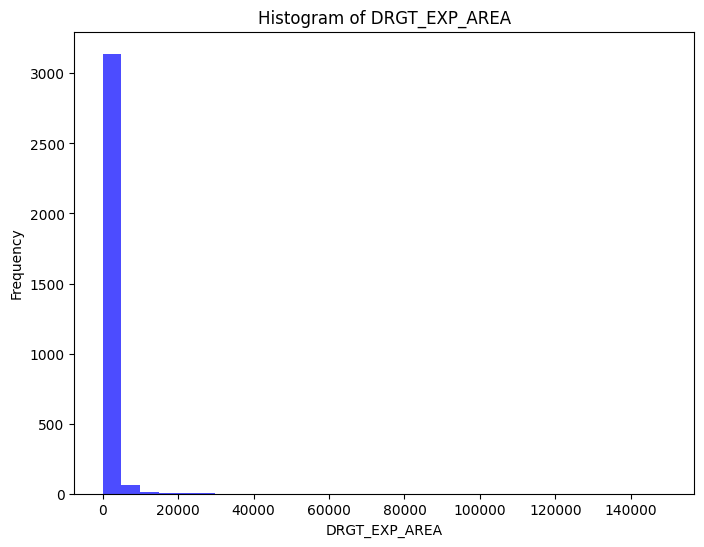

In [ ]:
## Task 1 - NRI Data Cleaning
import pandas as pd
NRI_Table_Counties = pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
print(NRI_Table_Counties.head())
NRI_subset = NRI_Table_Counties.filter(regex='STCOFIPS|_AFREQ$|_RISKR$')
print(NRI_subset.head())
missing_values = NRI_subset.isnull().sum()
missing_values = missing_values[missing_values.index.str.endswith(('_AFREQ', '_RISKR'))]
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)
NRI_Table_Counties['AVLN_AFREQ_Missing'] = NRI_Table_Counties['AVLN_AFREQ'].isnull()
cross_tab = pd.crosstab(NRI_Table_Counties['AVLN_AFREQ_Missing'], NRI_Table_Counties['AVLN_RISKR'], dropna=False)
print(cross_tab)
afreq_columns = [col for col in NRI_Table_Counties.columns if col.endswith('_AFREQ')]
for afreq_col in afreq_columns:
    risk_col = afreq_col.replace('_AFREQ', '_RISKR')
    NRI_Table_Counties.loc[NRI_Table_Counties[risk_col] == 'Not Applicable', afreq_col] = NRI_Table_Counties[afreq_col].fillna(0)
    print(NRI_Table_Counties[afreq_columns].head())

## Task 2 - SVI Data Cleaning
SVI_2022_US_county= pd.read_csv('C:/Users/sabahat/Desktop/ML-Folder/Sabahat-PRGS-Intro-to-ML-2024/Homework/data/raw/SVI_2022_US_county.csv', dtype={'FIPS': str})
columns_to_keep = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 
    'AREA_SQMI', 'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 
    'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 
    'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 
    'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 
    'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE']
svi_subset = SVI_2022_US_county[columns_to_keep]
print(svi_subset.head())
missing_values = SVI_2022_US_county.isnull().sum()
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'MissingCount']
print(missing_values_df)

# ======  Task 3 - Data Merging ======
nri_fips = set(NRI_Table_Counties['STCOFIPS'])
svi_fips = set(SVI_2022_US_county['FIPS'])
nri_not_in_svi = nri_fips - svi_fips
svi_not_in_nri = svi_fips - nri_fips
print("FIPS codes in NRI but not in SVI:", nri_not_in_svi)
print("FIPS codes in SVI but not in NRI:", svi_not_in_nri)
merged_data = pd.merge(NRI_Table_Counties, SVI_2022_US_county, left_on='STCOFIPS', right_on='FIPS', how='outer')
print(merged_data.head())
missing_values = merged_data.isnull().sum()
print(missing_values_df)

## Task 4 - Data AnalysisK
import matplotlib.pyplot as plt

def plot_histogram(column):
    plt.figure(figsize=(8, 6))
    plt.hist(merged_data[column].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
# Identify numerical columns
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical variables
for column in numerical_columns:
    plot_histogram(column)